In [1]:
#Import libraries
#import need library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

                                 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold


In [2]:
#import data 
df=pd.read_csv(r"D:\DATA SCIENCE\oasis infobyte\archive (5)\WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


1. **Fixed Acidity**: Fixed acidity in wine refers to the total concentration of non-volatile acids, such as tartaric, malic, and lactic acids. It contributes to the wine's taste, structure, and stability. The presence of fixed acidity provides a refreshing tartness and helps in balancing the wine's flavor profile, making it an important component for overall taste and aging potential.

2. **Volatile Acidity**: Volatile acidity in wine refers to the concentration of acids that can vaporize, such as acetic acid. While small amounts of volatile acidity can contribute to the wine's complexity, excessive levels can lead to undesirable vinegar-like aromas and flavors. Controlling volatile acidity is crucial in maintaining the wine's quality and preventing off-flavors.

3. **Citric Acid**: Citric acid is a natural acid found in wine, often originating from the grapes themselves. It can contribute to the wine's freshness and fruitiness, enhancing its overall flavor profile. However, excessive levels of citric acid can lead to a sour or overly acidic taste, so its presence must be balanced to ensure a harmonious wine.

4. **Residual Sugar**: Residual sugar refers to the natural sugars remaining in the wine after fermentation. It can contribute to the wine's sweetness, body, and mouthfeel. Wines with higher residual sugar levels tend to have a sweeter taste, while those with lower levels are drier. The presence of residual sugar is important in defining the wine's style and can influence its pairing with food.

5. **Chlorides**: Chlorides in wine, originating from the soil and winemaking process, can impact the wine's taste and stability. While small amounts of chlorides can contribute to the wine's complexity, excessive levels can lead to a salty or briny taste, negatively affecting the overall flavor profile.

6. **Free Sulfur Dioxide**: Free sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. It plays a crucial role in maintaining the wine's freshness, stability, and aging potential. Proper levels of free sulfur dioxide are essential for ensuring the wine's longevity and quality.

7. **Total Sulfur Dioxide**: Total sulfur dioxide encompasses both the free and bound forms of sulfur dioxide in wine. It serves as a preservative and antioxidant, protecting the wine from spoilage and oxidation. Monitoring total sulfur dioxide levels is important for ensuring the wine's shelf life and overall quality.

8. **Density**: Density in wine is a measure of its mass per unit volume and can provide insights into the wine's alcohol content and potential sweetness. It contributes to the wine's body and mouthfeel, with higher density wines often exhibiting a richer and more viscous texture.

9. **pH**: The pH level of wine influences its acidity, microbial stability, and color stability. It plays a crucial role in shaping the wine's overall taste and mouthfeel. Proper pH levels are important for ensuring the wine's balance and longevity.

10. **Sulphates**: Sulphates, often in the form of sulfur dioxide, are used in winemaking as a preservative and antimicrobial agent. They help prevent oxidation and microbial spoilage, contributing to the wine's stability and longevity. However, excessive levels of sulphates can lead to undesirable aromas and flavors, so their presence must be carefully managed.

11. **Alcohol**: The alcohol content of wine contributes to its body, texture, and overall flavor profile. It influences the wine's warmth, mouthfeel, and perceived sweetness. The alcohol level is an important factor in defining the wine's style and can impact its aging potential.

In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
#shape
df.shape

(1143, 13)

In [5]:
#columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [6]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: >

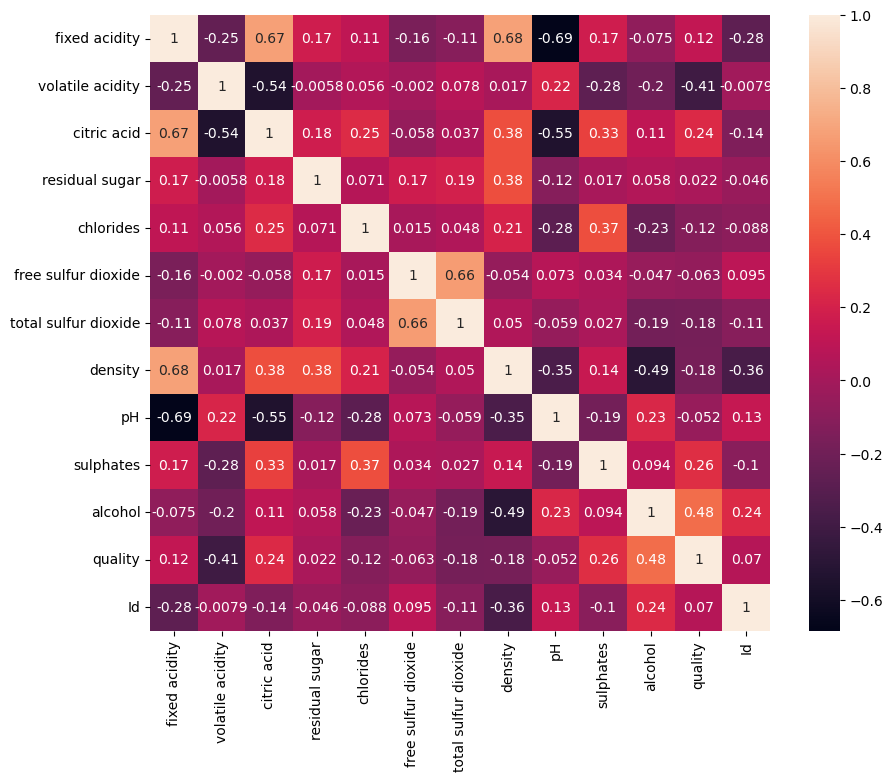

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### EDA ANALYSIS

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>],
       [<Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

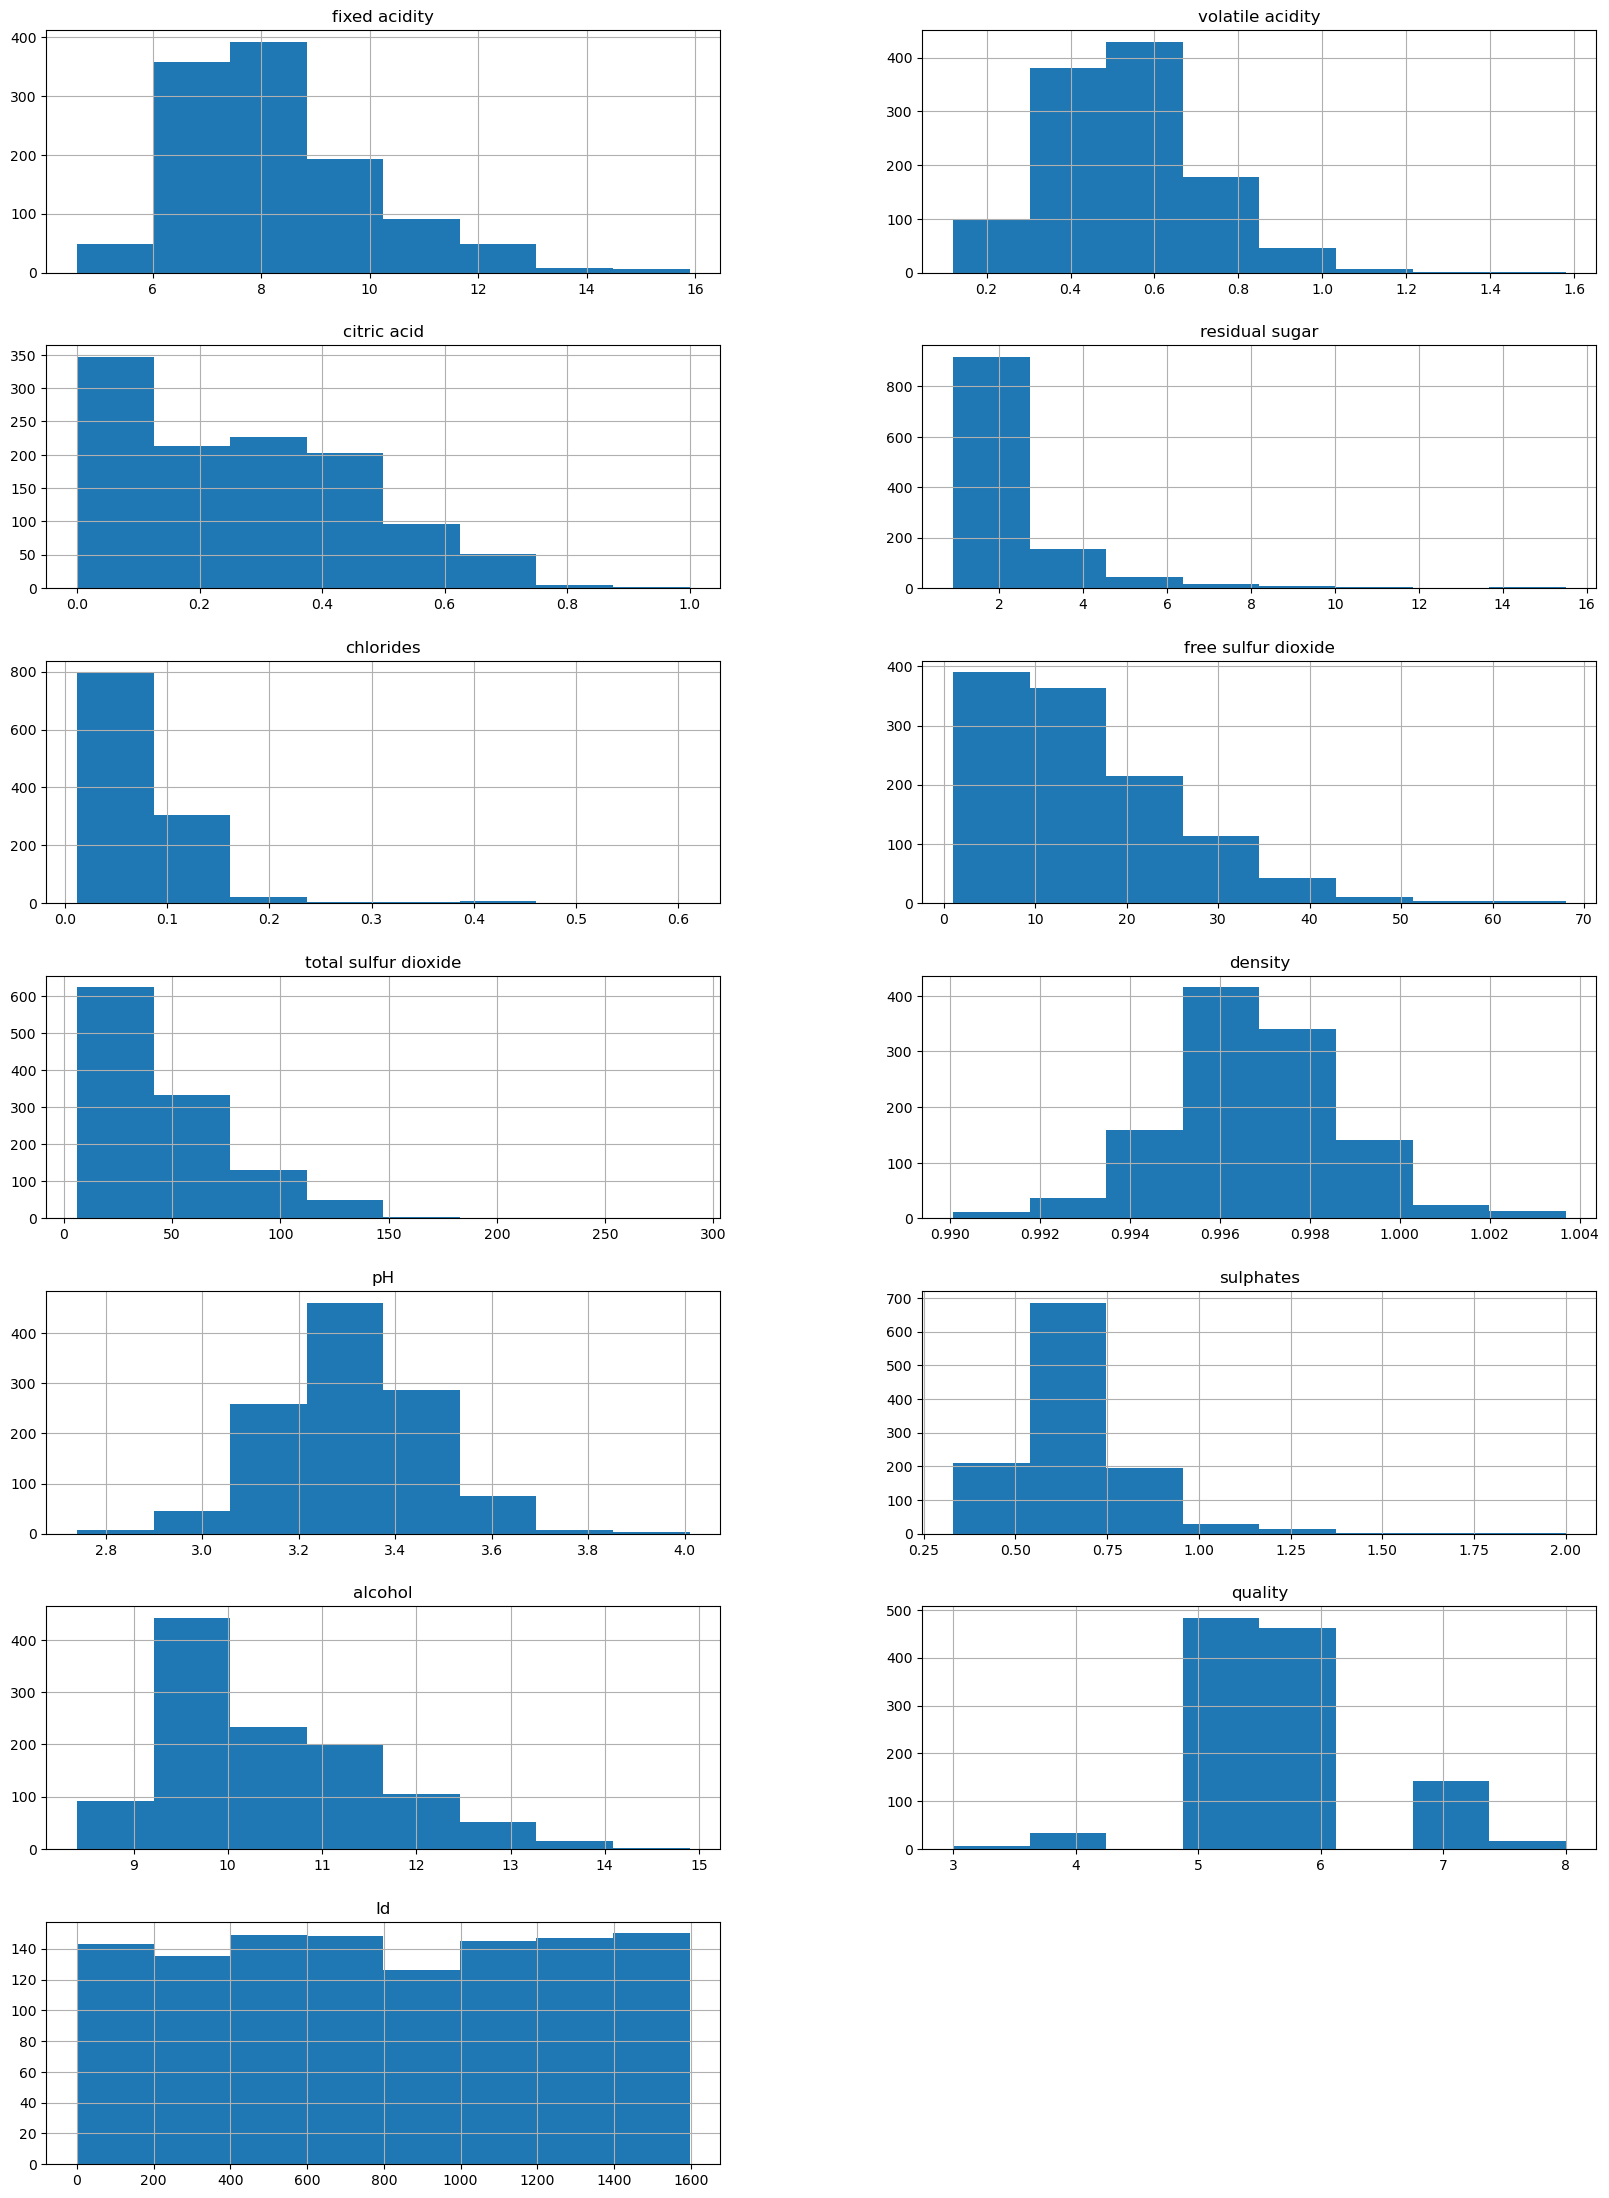

In [11]:
col=list(df[0:])
df[col].hist(stacked=False,bins=8,figsize=(20,40),layout=(10,2))

outlier & statistics

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

The outliers of fixed acidity :44
The outliers of volatile acidity :14
The outliers of citric acid :1
The outliers of residual sugar :110
The outliers of chlorides :77
The outliers of free sulfur dioxide :18
The outliers of total sulfur dioxide :40
The outliers of density :36
The outliers of pH :20
The outliers of sulphates :43
The outliers of alcohol :12
The outliers of quality :22
The outliers of Id :0


C:\Users\Rv\AppData\Local\Temp\ipykernel_18044\163442220.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=axes[1],bins=10,kde=True)
C:\Users\Rv\AppData\Local\Temp\ipykernel_18044\163442220.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=axes[1],bins=10,kde=True)
C:\Use

<Figure size 640x480 with 0 Axes>

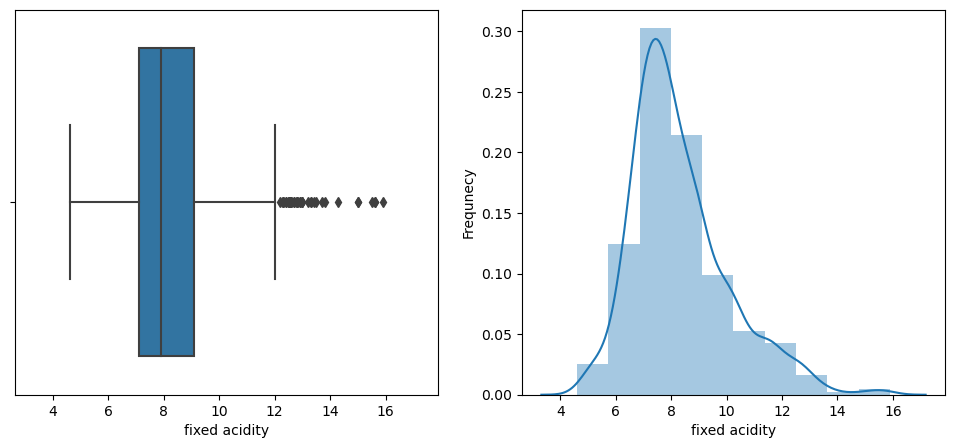

<Figure size 640x480 with 0 Axes>

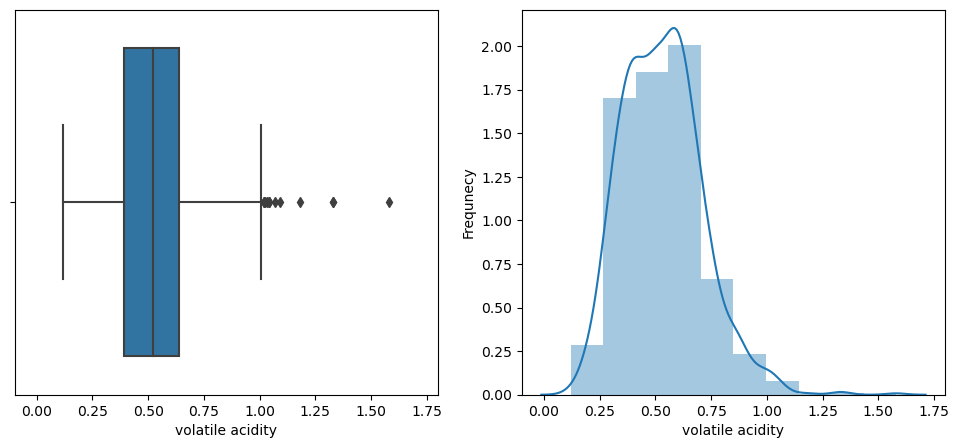

<Figure size 640x480 with 0 Axes>

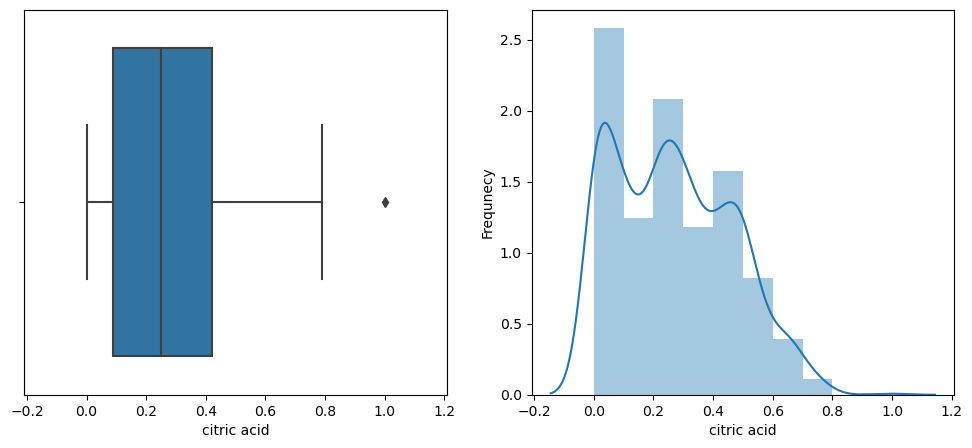

<Figure size 640x480 with 0 Axes>

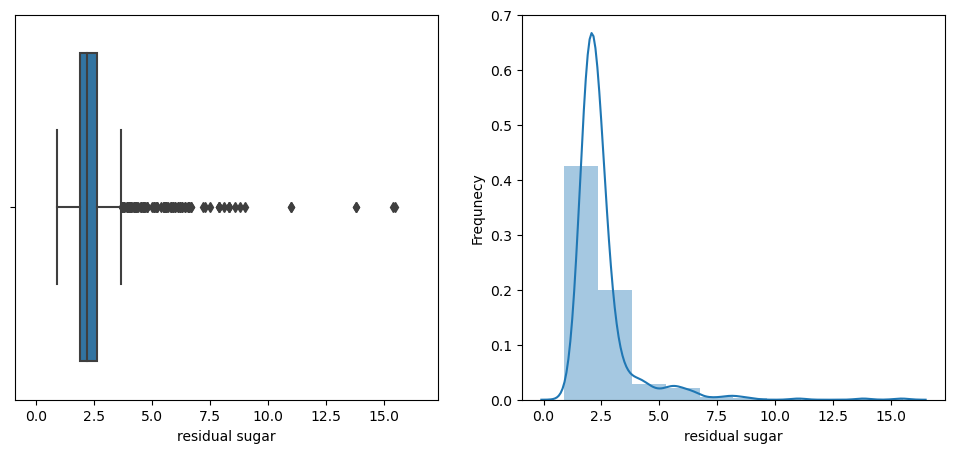

<Figure size 640x480 with 0 Axes>

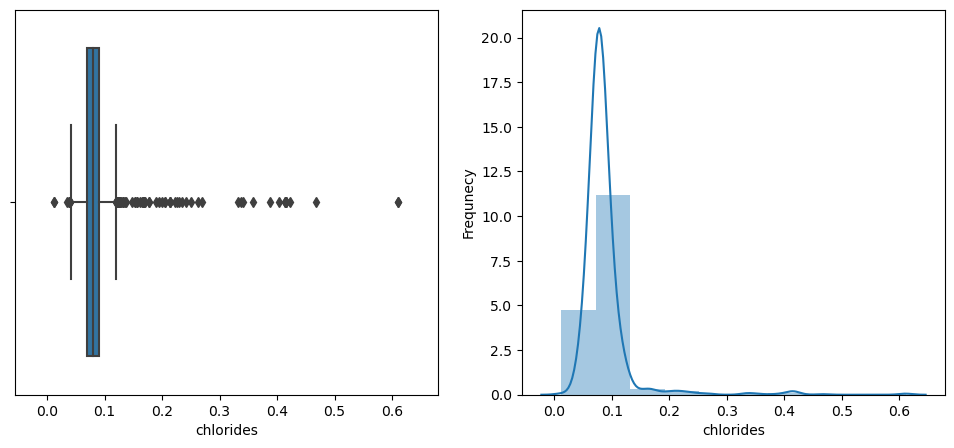

<Figure size 640x480 with 0 Axes>

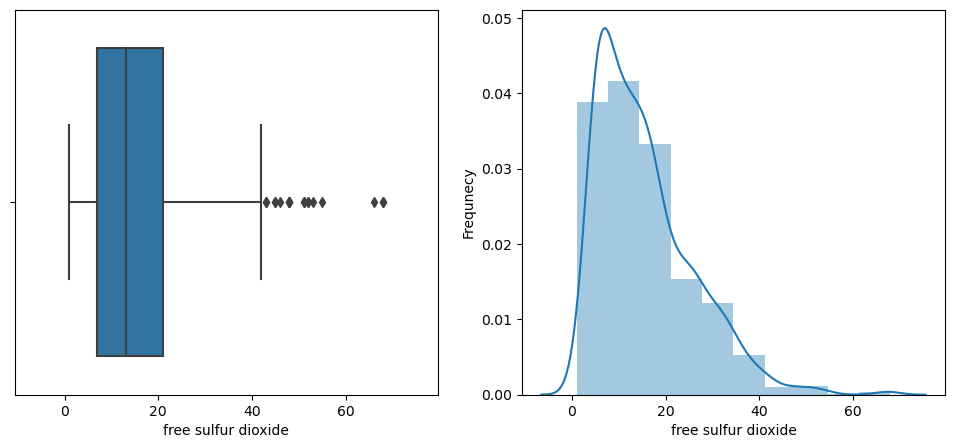

<Figure size 640x480 with 0 Axes>

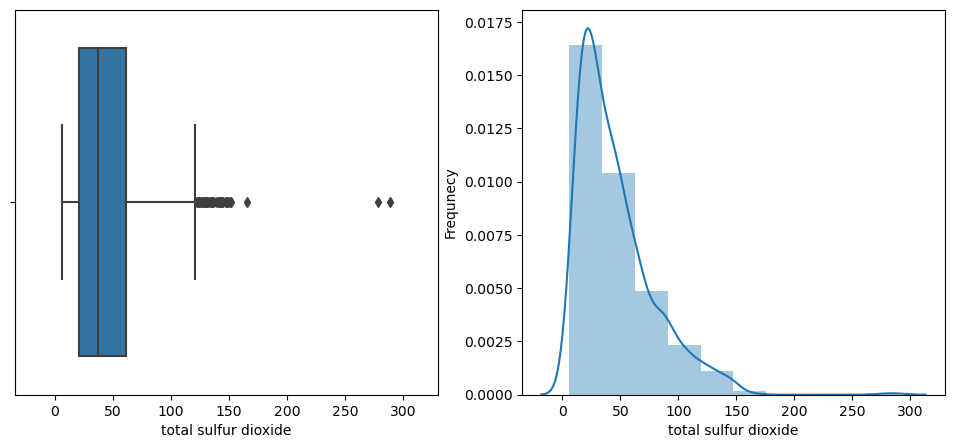

<Figure size 640x480 with 0 Axes>

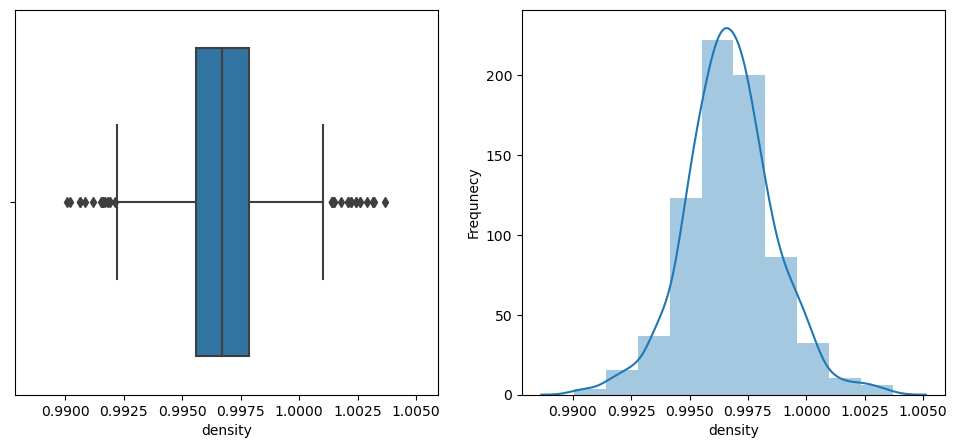

<Figure size 640x480 with 0 Axes>

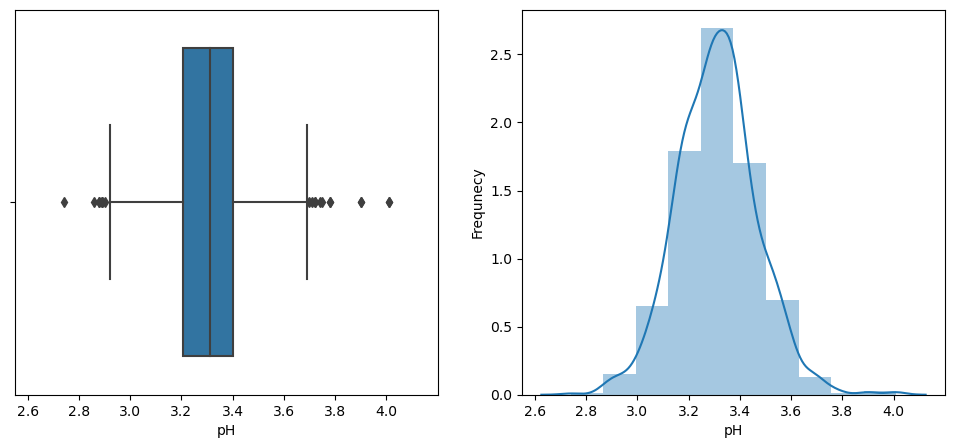

<Figure size 640x480 with 0 Axes>

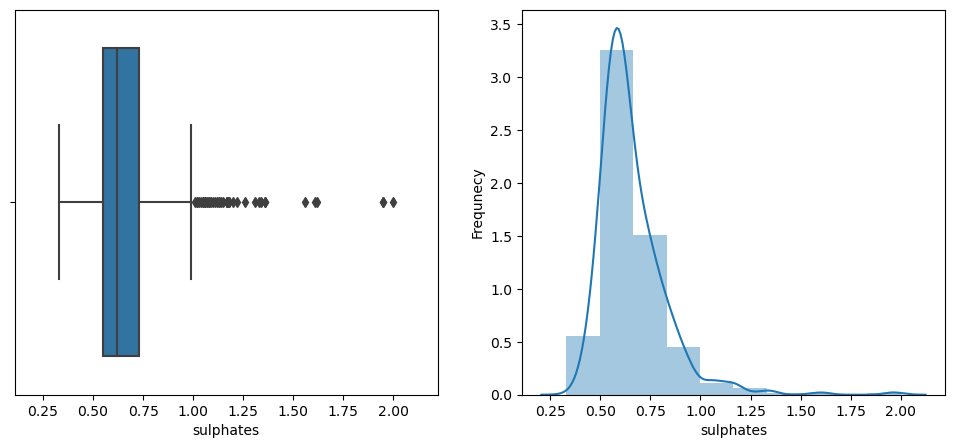

<Figure size 640x480 with 0 Axes>

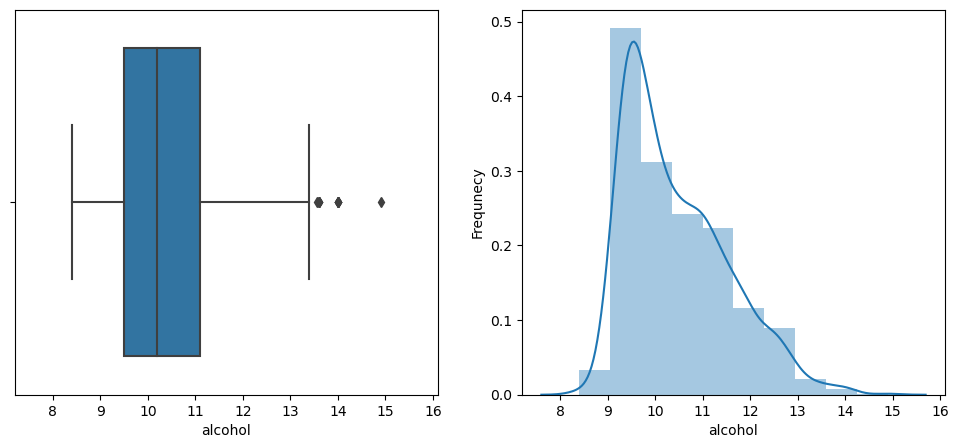

<Figure size 640x480 with 0 Axes>

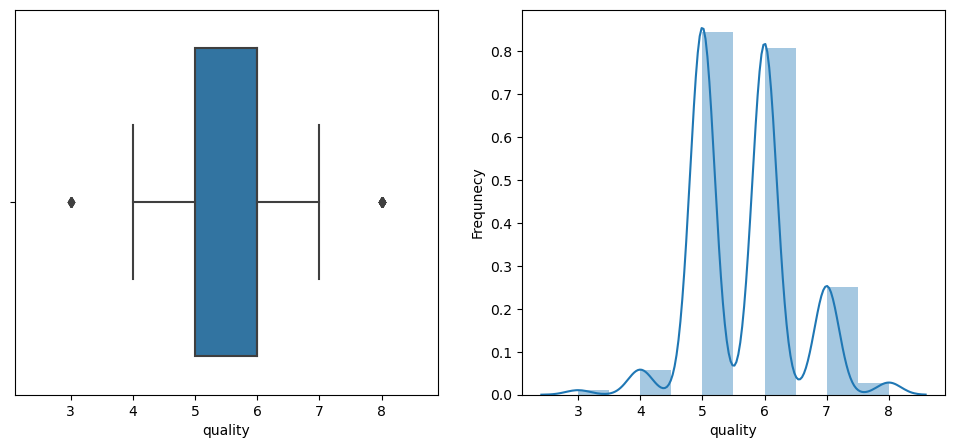

<Figure size 640x480 with 0 Axes>

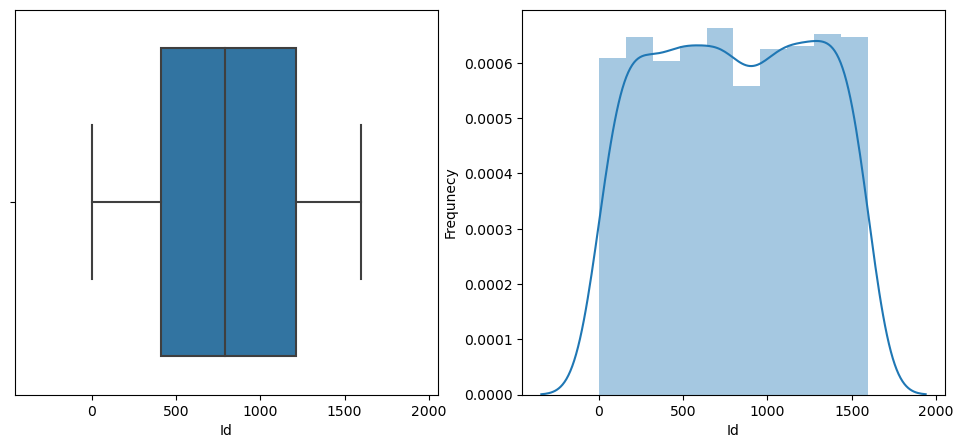

In [13]:
col=df.columns
for i in col:
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    iqr=q75-q25
    cutoff=iqr*1.5
    lower,upper=q25-cutoff,q75+cutoff
    outliers=[i for i in df[i]if i<lower or i>upper]
    print("{}The outliers of {} :{}".format("\033[1m",i,(len(outliers))))
    
for i in col:
    plt.figure()
    #plt.tight_layout()
    #sns.set(rc={"figure.figsize":(12,5)})
    f,axes=plt.subplots(1,2,sharex=True,figsize=(12,5))
    plt.gca().set(xlabel=i,ylabel="Frequnecy")
    sns.boxplot(x=df[i],ax=axes[0])
    sns.distplot(df[i],ax=axes[1],bins=10,kde=True)

    

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

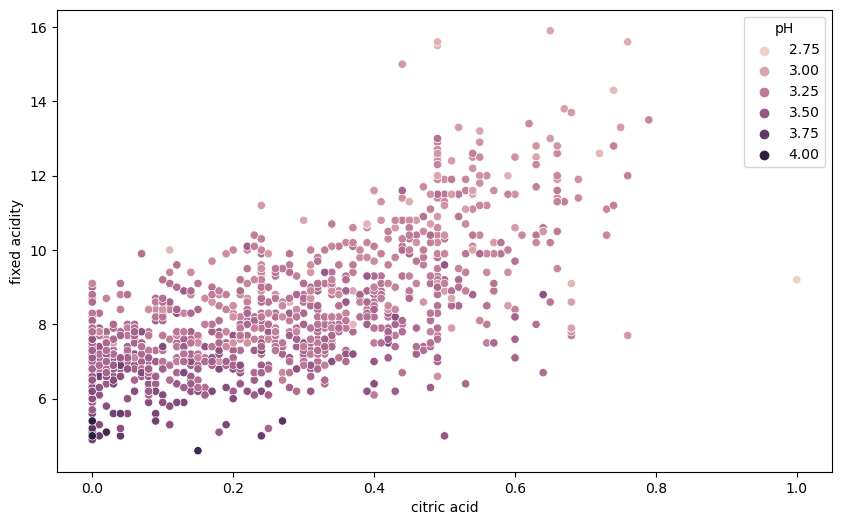

In [15]:
#fixed acidity vs citric acid
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y="fixed acidity",x="citric acid",hue="pH")

**There is a postive correlation between them.**


**If the fixed acidity of a solution, such as wine, is increased, it can lead to a more tart or sour taste.
 with increase in fixed acidity pH value also decrease.**
 
**As the citric acid content increases, there is a general increase in fixed acidity. The pH level also appears to increase with the increase of both citric acid and fixed acidity.**


**A legend on the right side indicates different colors corresponding to different pH levels: purple for 2.75, dark pink for 3.00, light pink for 3.25, very light pink for 3.50, even lighter pink for 3.75, and almost white for 4.00.**

**Most data points are clustered between 0 to 0.4 citric acid and between approximately six and ten fixed acidity. There is an observable trend where an increase in citric acid correlates with an increase in fixed acidity.**

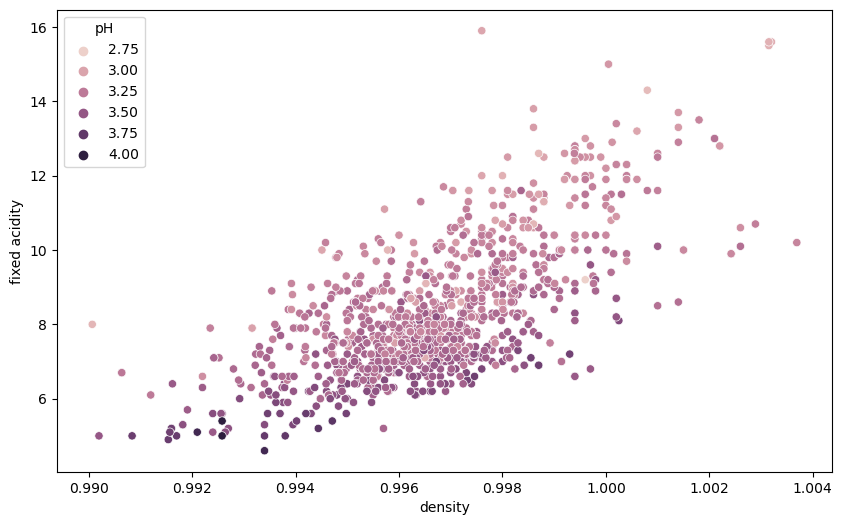

In [16]:
# Fixed acidity vs density
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='fixed acidity', x= 'density',hue="pH");

**As the fixed acidity of wine increases, the density of the wine also tends to increase. This relationship is due to the presence of acids in the wine, which can contribute to its overall density.**

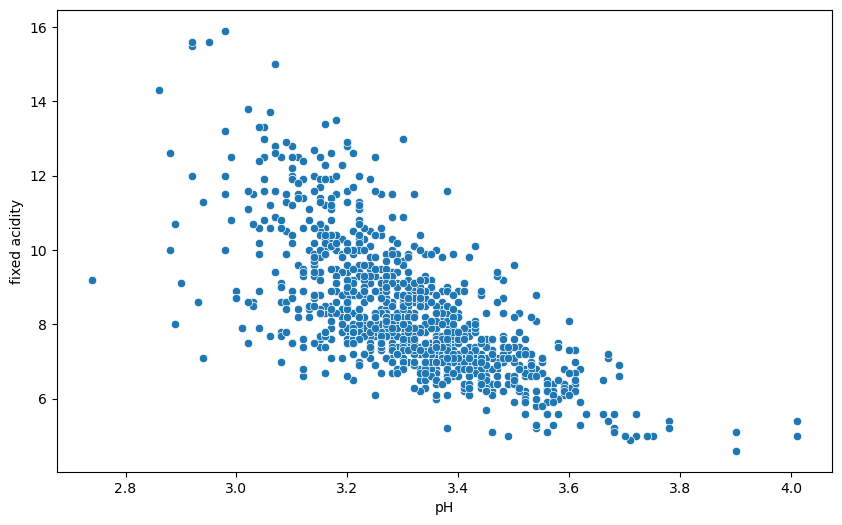

In [17]:
# fixed acidity vs pH
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='fixed acidity', x= 'pH');

**There is a negative correlation between them.In wine, fixed acidity and pH are closely related. As fixed acidity increases, the pH of the wine tends to decrease, making the wine more acidic. Conversely, as fixed acidity decreases, the pH tends to increase, making the wine less acidic.**

**A general trend can be observed where as the pH value increases, the fixed acidity decreases 2.**

7.9 is median value.


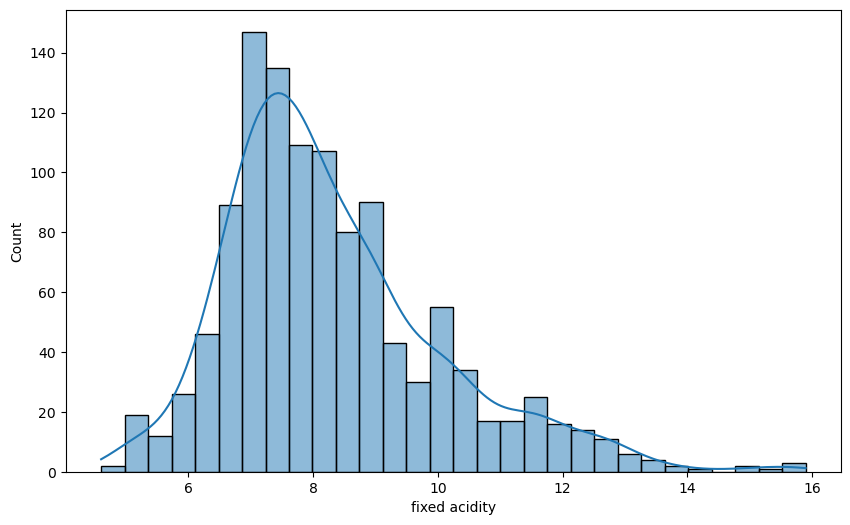

In [18]:
median_value = np.median(df['fixed acidity'])
print(f'{median_value} is median value.')
plt.figure(figsize=(10,6))
sns.histplot(data=df, x= 'fixed acidity',kde=True);

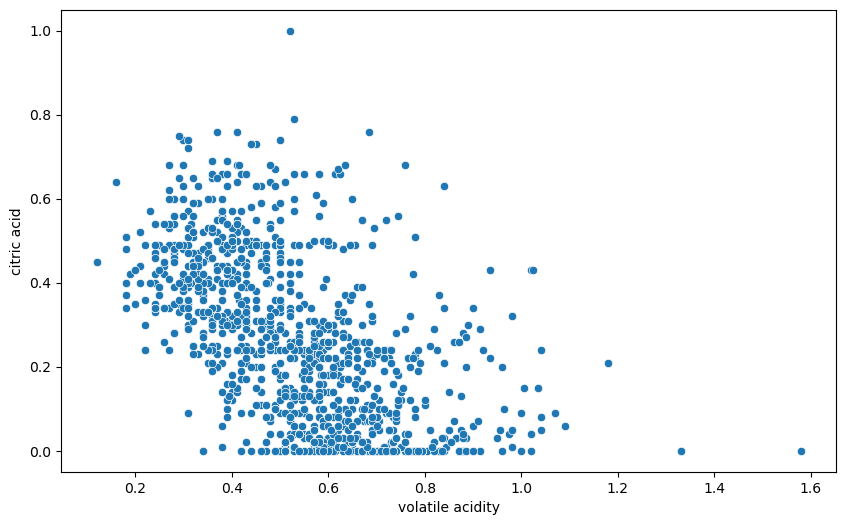

In [19]:
# volatile acidity vs citric acid
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='citric acid',x='volatile acidity');

**There is negative correlation.As critric acid is a non-volatile acid and more it's presence in wine lead to less presence of volatile acidity.***

0.52 is median value.


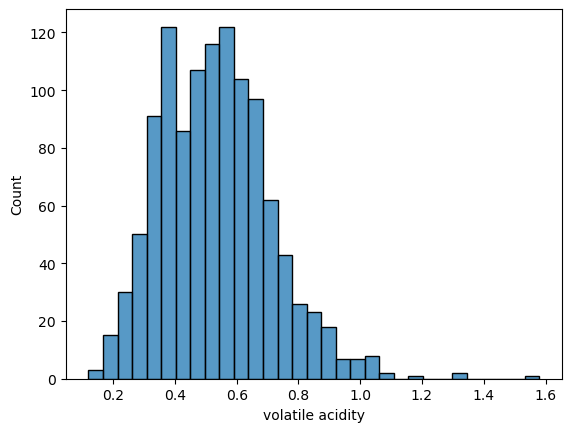

In [20]:
median_value = np.median(df['volatile acidity'])
print(f'{median_value} is median value.')
sns.histplot(data=df, x= 'volatile acidity');

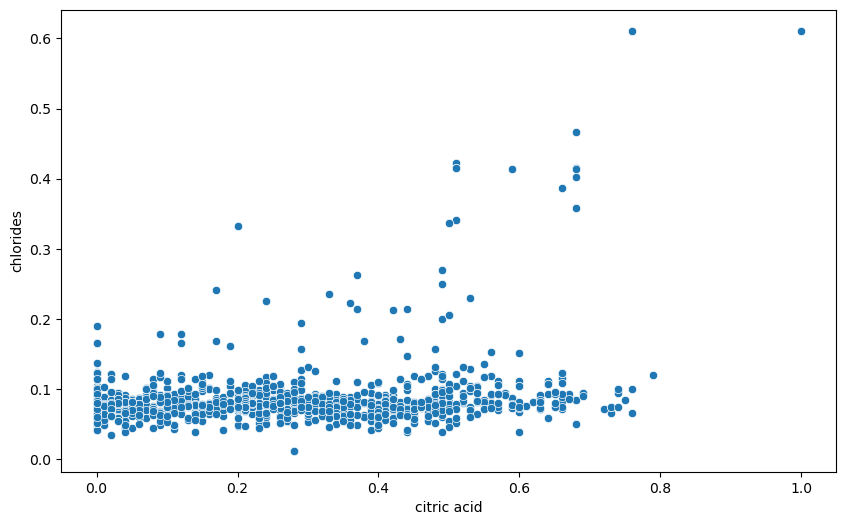

In [21]:
# citric acid vs chlorides
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='citric acid',y='chlorides');

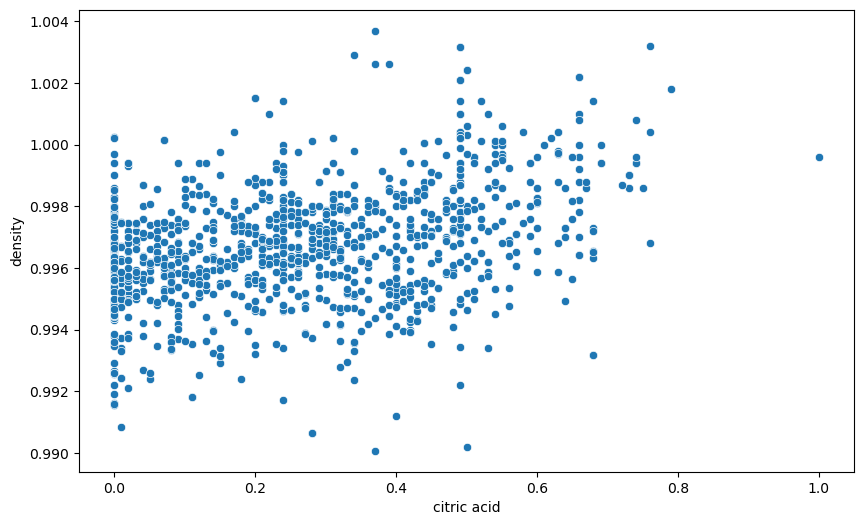

In [22]:
# citric acid vs density

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='citric acid',y='density');

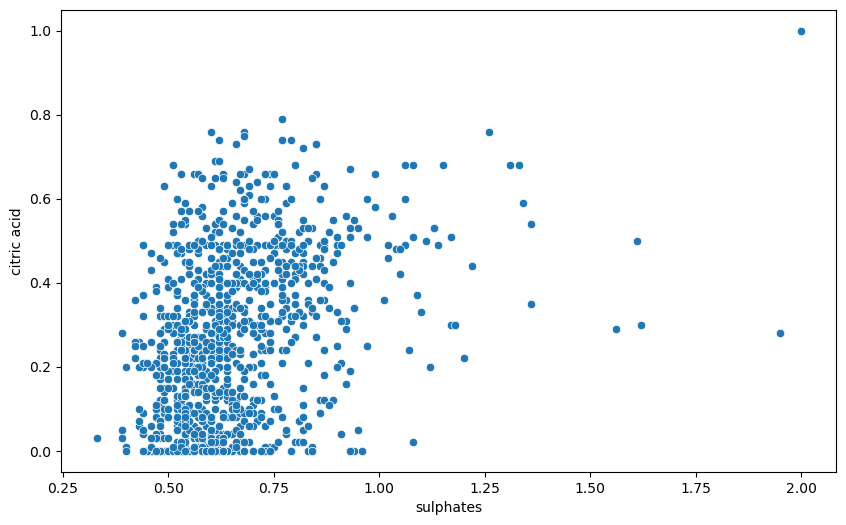

In [23]:
# citric acid vs sulphates
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='citric acid',x='sulphates');

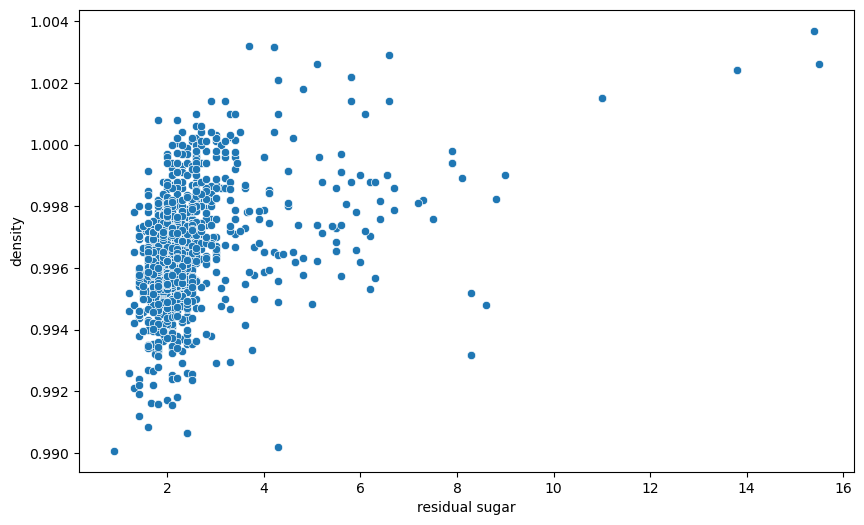

In [24]:
# residual sugar vs density
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='residual sugar',y='density');

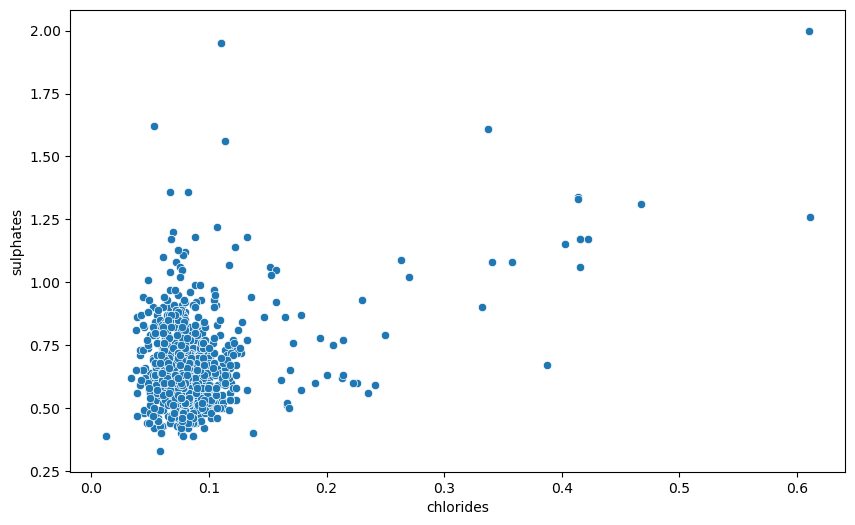

In [25]:
# chlorides vs sulphates
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='chlorides',y='sulphates');

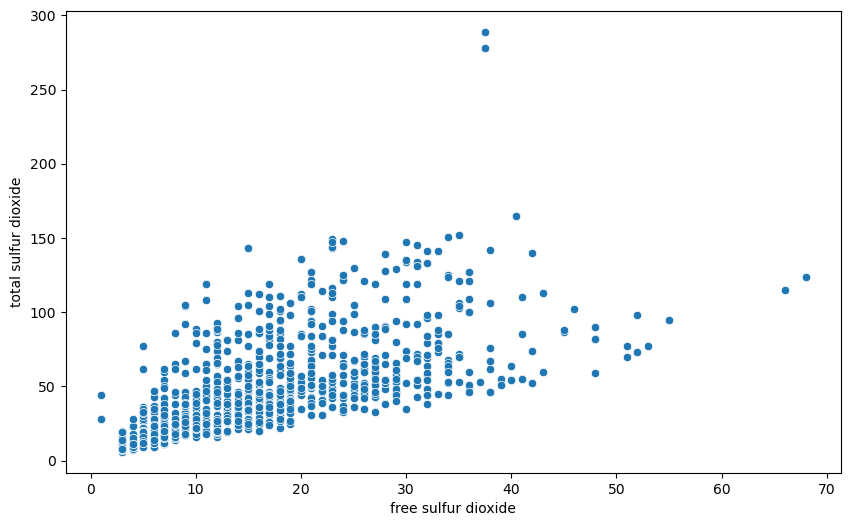

In [26]:
# free sulfur dioxide vs total sulfur dioxide
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide');


**free sulfur dioxide (SO2) and total sulfur dioxide are correlated in the sense that the total SO2 level includes both the free and bound forms of SO2. Free SO2 is the portion that is active and able to protect the wine from oxidation and microbial spoilage, while bound SO2 is chemically linked to other compounds and is not as readily available for these protective functions. Therefore, the total SO2 level is a sum of both the free and bound forms, and understanding their correlation is important for managing the wine's stability and shelf life.**

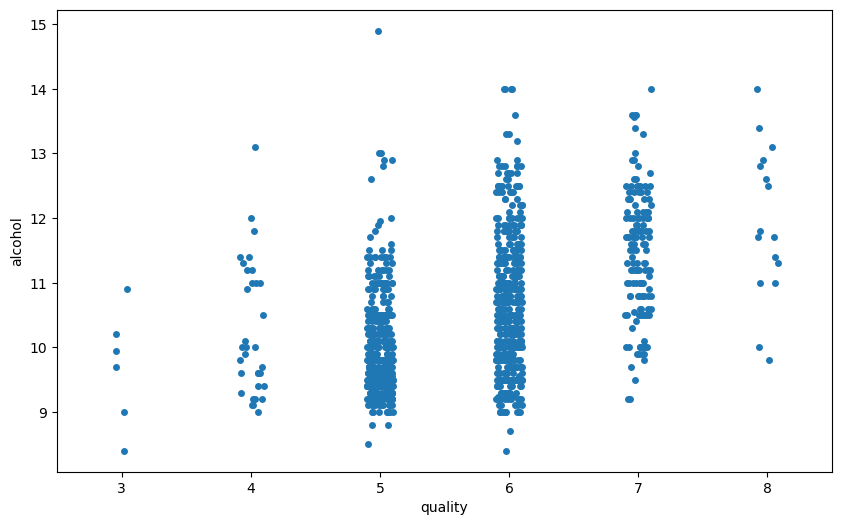

In [27]:
# alcohol vs quality
plt.figure(figsize=(10,6))
sns.stripplot(df,y='alcohol',x='quality');

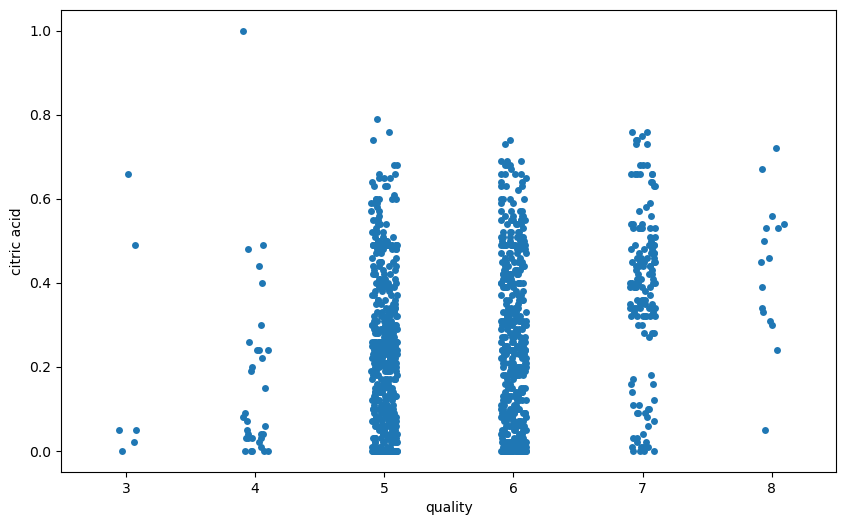

In [28]:
# alcohol vs quality
plt.figure(figsize=(10,6))
sns.stripplot(df,y='citric acid',x='quality');

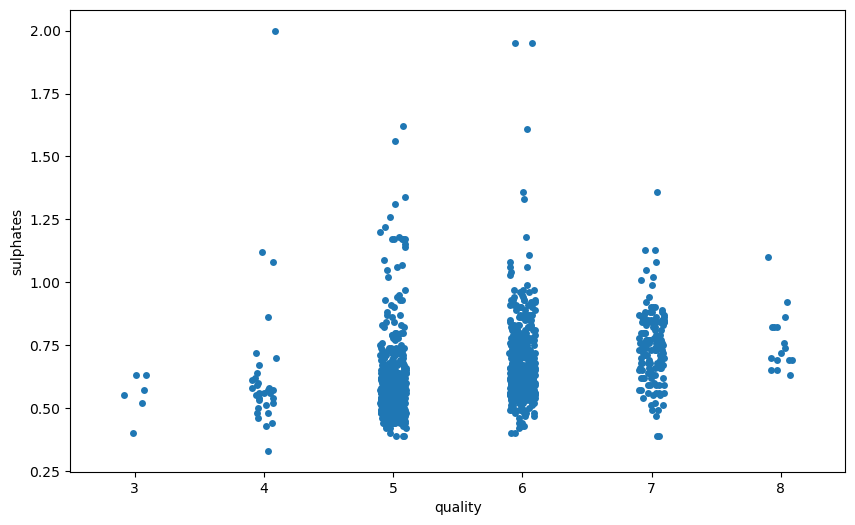

In [29]:
# alcohol vs quality
plt.figure(figsize=(10,6))
sns.stripplot(df,y='sulphates',x='quality');

In [30]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

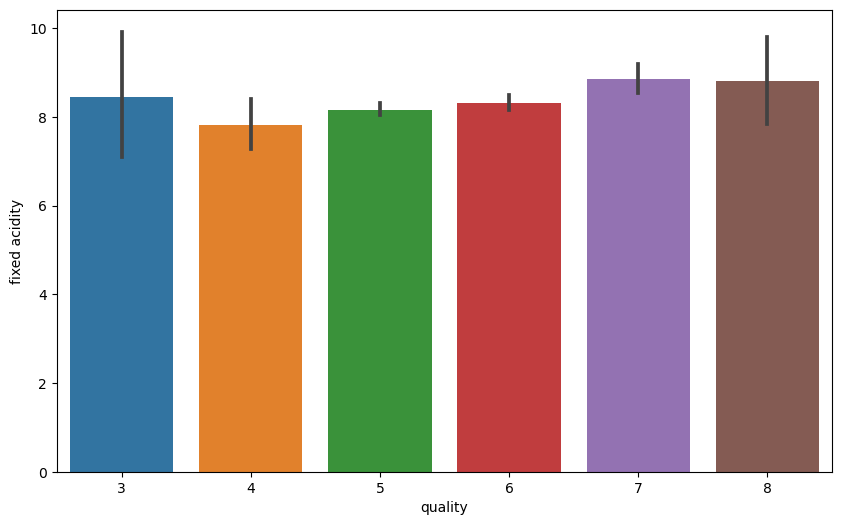

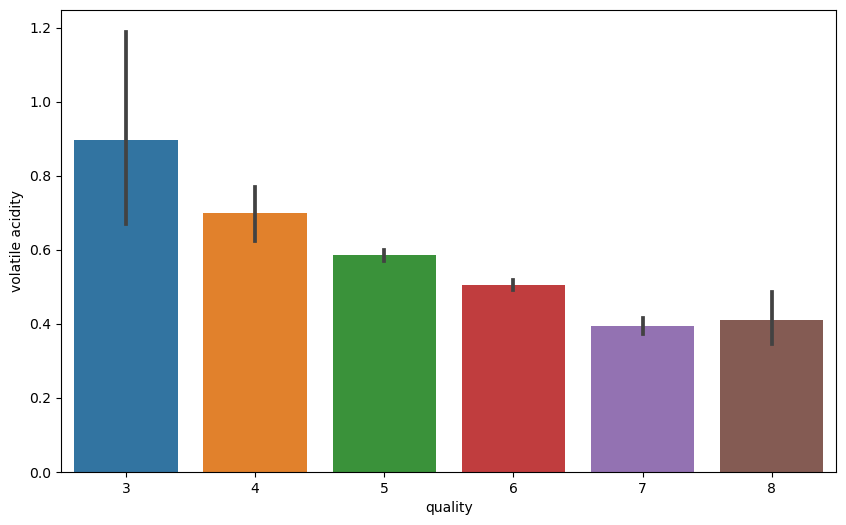

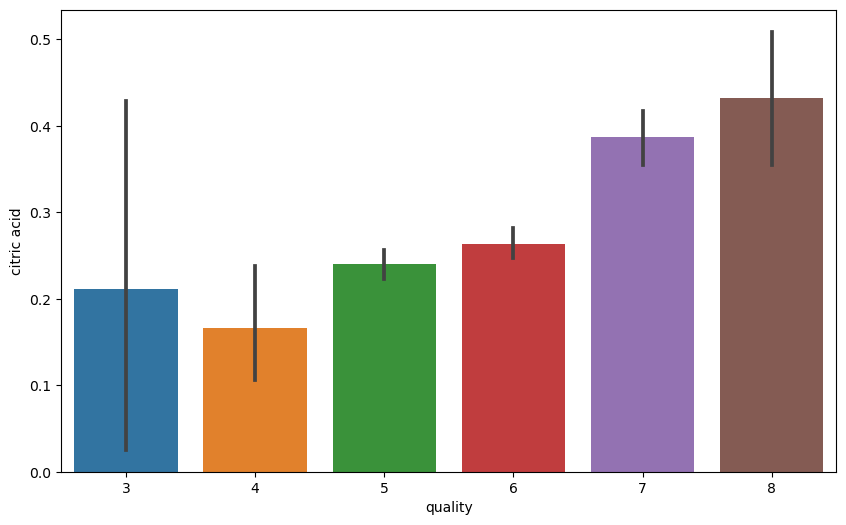

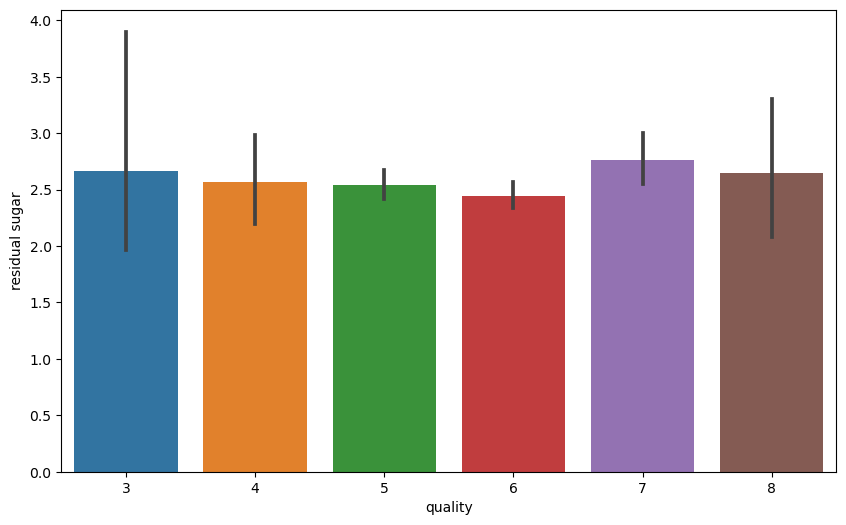

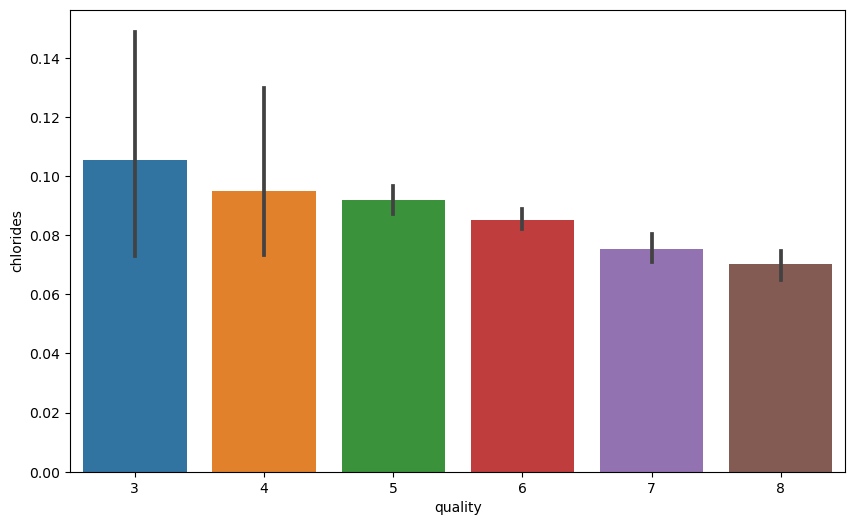

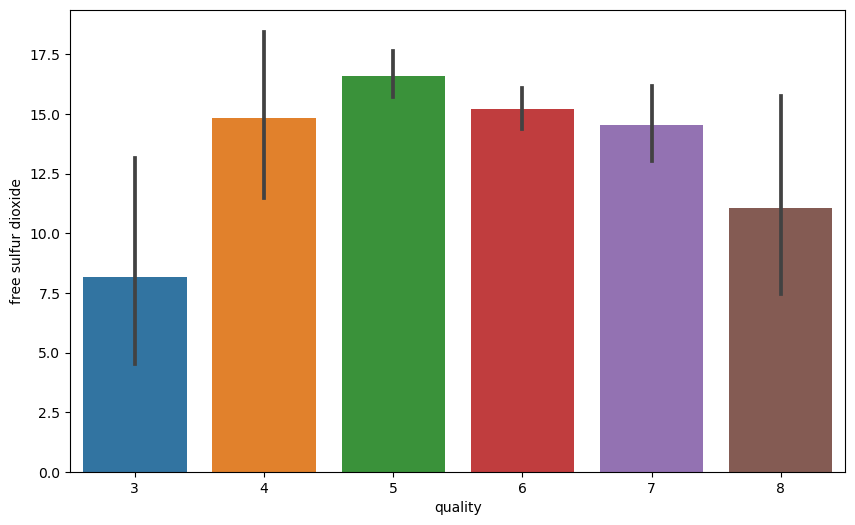

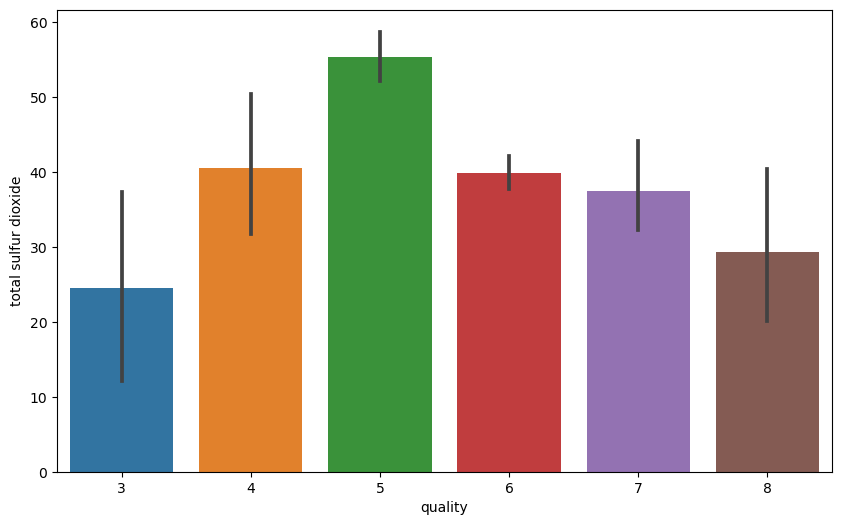

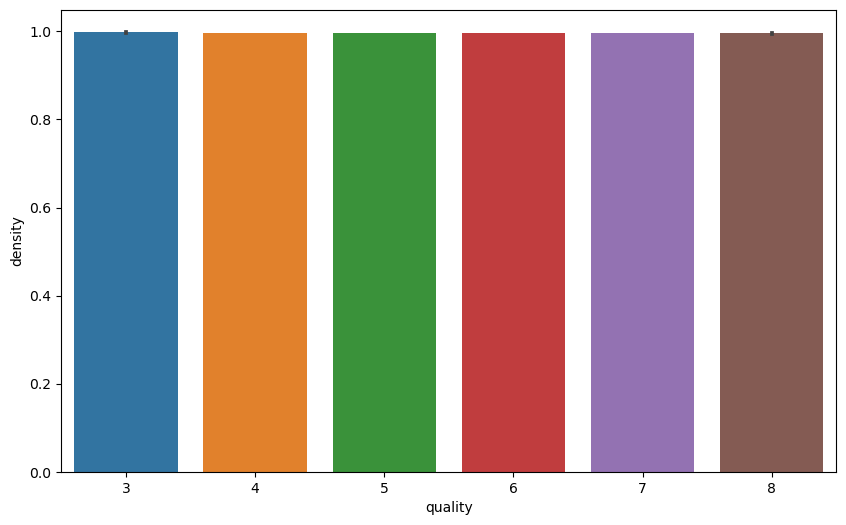

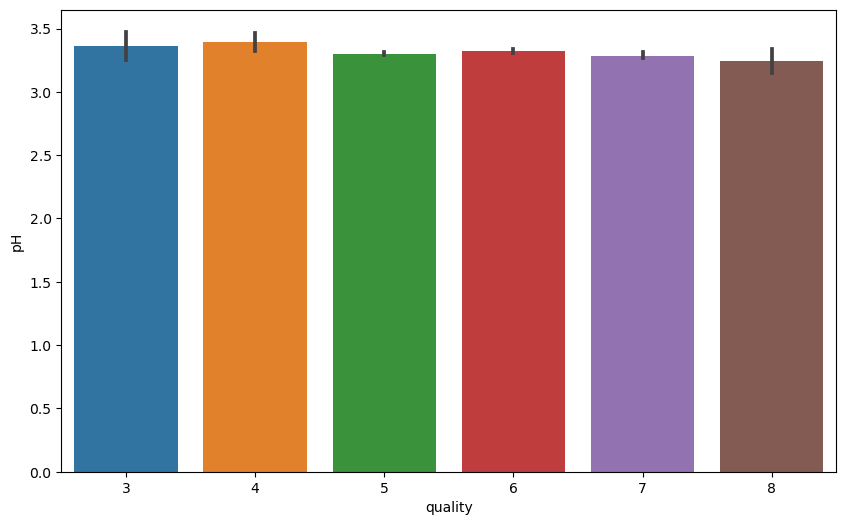

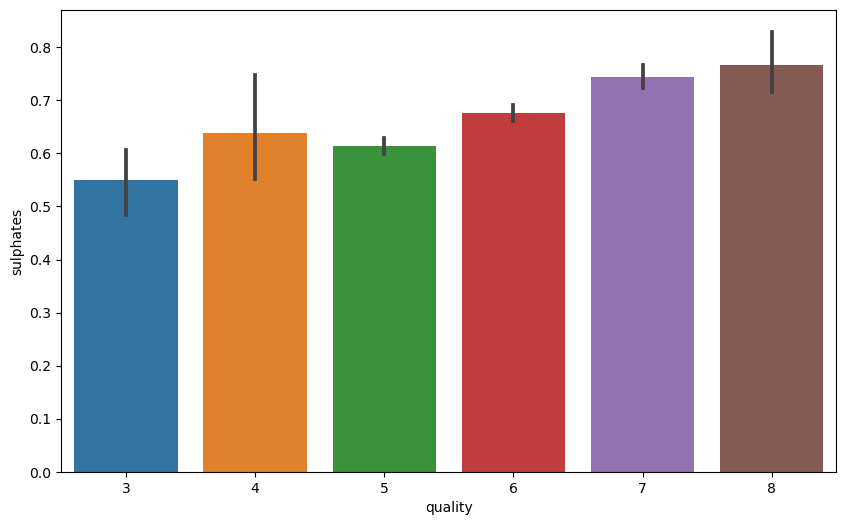

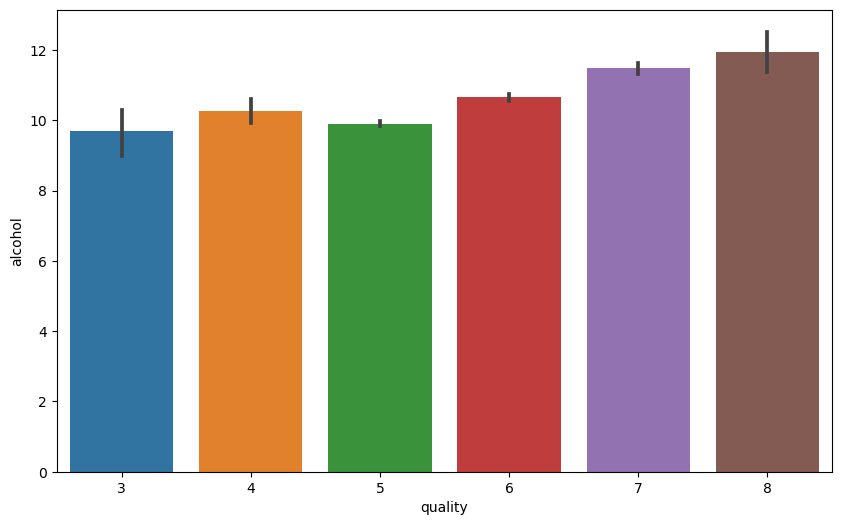

In [31]:
col=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in col:
    #df1=df.copy()
    
    plt.figure(figsize=(10,6))
    
    #df1[i].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
    sns.barplot(x="quality",y=df[i],data=df)
    axes[0].set_title(i)
    #axes[1].set_title(i)
    plt.show()


## hypothesis testing

**statistic testing for continous variable with target variable**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [32]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [33]:
from scipy import stats
col=list(df.select_dtypes(include=['int64','float64']).columns)

In [34]:
for i in col:
    x = np.array(df[df.quality == 5][i]) 
    y = np.array(df[df.quality == 6][i])
    y1 = np.array(df[df.quality == 7][i])
    y2 = np.array(df[df.quality == 4][i])
    
    y3 = np.array(df[df.quality == 8][i])
    
    y4 = np.array(df[df.quality == 3][i])
    
    f_stat, p_value  = stats.f_oneway(x,y,y1,y2,y3,y4) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05: 
        # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.\n There is no significant relationship between {} and quality'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\nThere is significant relationship between {} and quality'.format('\033[1m',i))
    print('\n')

 P_Value:0.0006814325553734389
 Rejecting Null Hypothesis.
 There is no significant relationship between fixed acidity and quality


 P_Value:4.4464430277960794e-45
 Rejecting Null Hypothesis.
 There is no significant relationship between volatile acidity and quality


 P_Value:6.321608219149029e-17
 Rejecting Null Hypothesis.
 There is no significant relationship between citric acid and quality


 P_Value:0.2905042171936214
 Fail to Reject Null Hypothesis.
There is significant relationship between residual sugar and quality


 P_Value:0.0025623316370362785
 Rejecting Null Hypothesis.
 There is no significant relationship between chlorides and quality


 P_Value:0.01988522953841685
 Rejecting Null Hypothesis.
 There is no significant relationship between free sulfur dioxide and quality


 P_Value:1.5066758863466093e-14
 Rejecting Null Hypothesis.
 There is no significant relationship between total sulfur dioxide and quality


 P_Value:5.907001210173404e-08
 Rejecting Null Hypothesis.
 

C:\Users\Rv\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Before imputing the mean value for outliers

<Axes: >

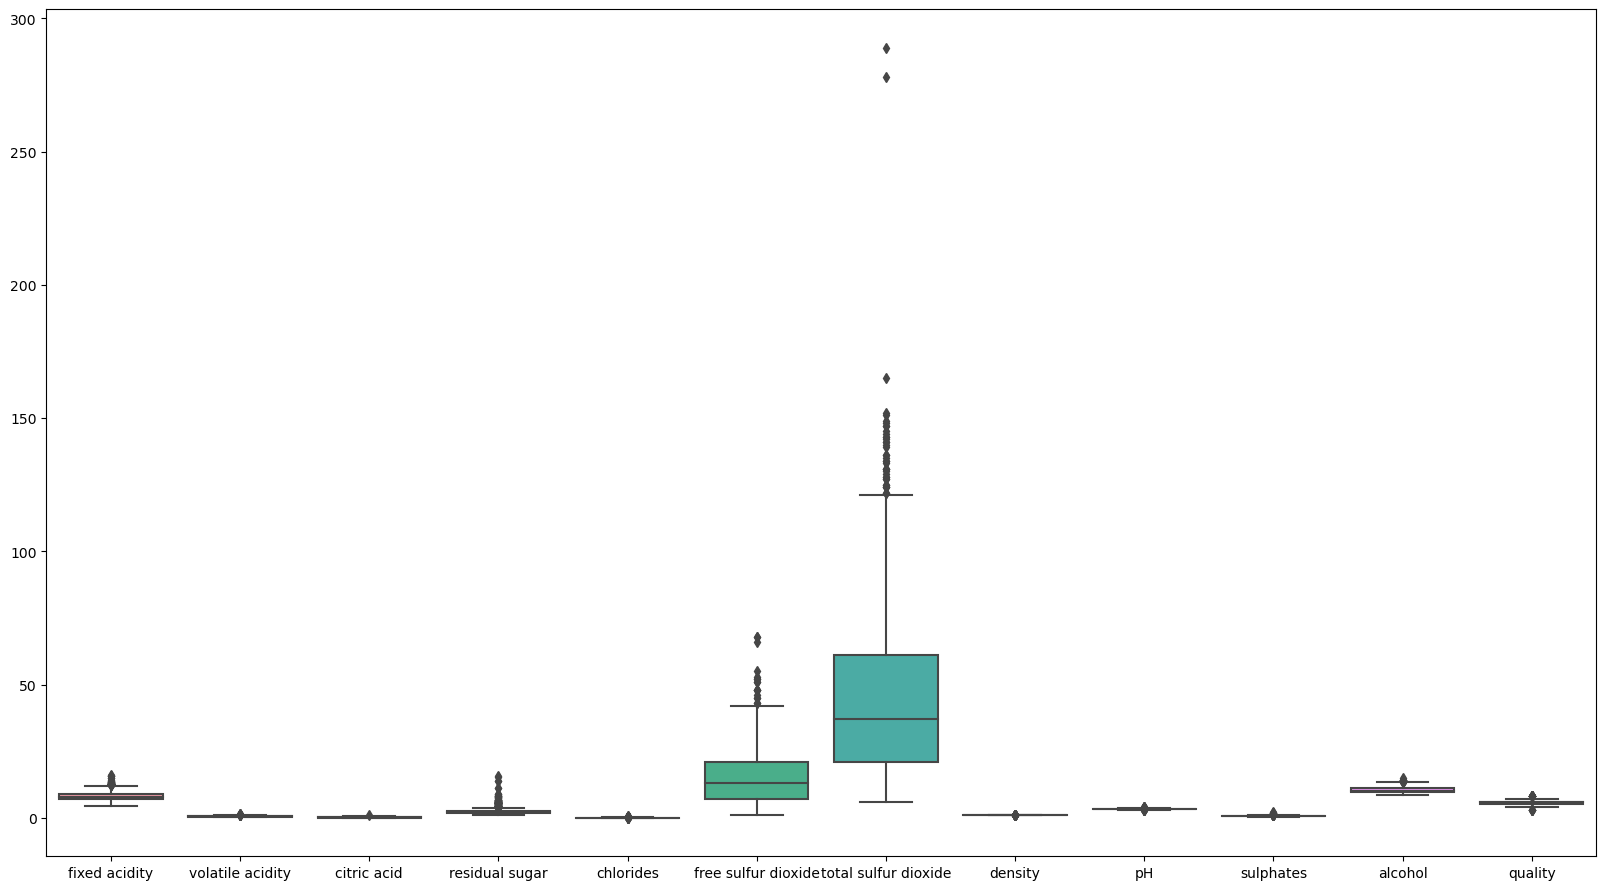

In [35]:
df.drop("Id",axis=1,inplace=True)
plt.figure(figsize=(20,11))
sns.boxplot(df)

In [36]:
col=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i in col:
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    iqr=q75-q25
    cutoff=iqr*1.5
    lower,upper=q25-cutoff,q75+cutoff
    outliers=[i for i in df[i]if i<lower or i>upper]
    print("{}Before imputing the outliers of {} :{}".format("\033[1m",i,(len(outliers))))
    
    df_inc=df.loc[(df[i]>=lower)&(df[i]<=upper)]
    mean=(df_inc[i].mean())
    print("{}Mean value of the outliers of {} :{}".format("\033[1m",i,mean))
    
    df[i]=np.where(df[i]<lower,mean,df[i])
    df[i]=np.where(df[i]>upper,mean,df[i])
    outlier=[x for x in df[i]if x<lower or x>upper]
    print("{}After imputing mean value of Outlier {} :{}".format("\033[1m",i,(len(outlier))))
    print("\n")
   

Before imputing the outliers of fixed acidity :44
Mean value of the outliers of fixed acidity :8.116651501364876
After imputing mean value of Outlier fixed acidity :0


Before imputing the outliers of volatile acidity :14
Mean value of the outliers of volatile acidity :0.5239149689991143
After imputing mean value of Outlier volatile acidity :0


Before imputing the outliers of citric acid :1
Mean value of the outliers of citric acid :0.267723292469352
After imputing mean value of Outlier citric acid :0


Before imputing the outliers of residual sugar :110
Mean value of the outliers of residual sugar :2.1818489835430785
After imputing mean value of Outlier residual sugar :0


Before imputing the outliers of chlorides :77
Mean value of the outliers of chlorides :0.07870356472795495
After imputing mean value of Outlier chlorides :0


Before imputing the outliers of free sulfur dioxide :18
Mean value of the outliers of free sulfur dioxide :15.038666666666666
After imputing mean value of Ou

### After imputing the mean value for outliers

<Axes: >

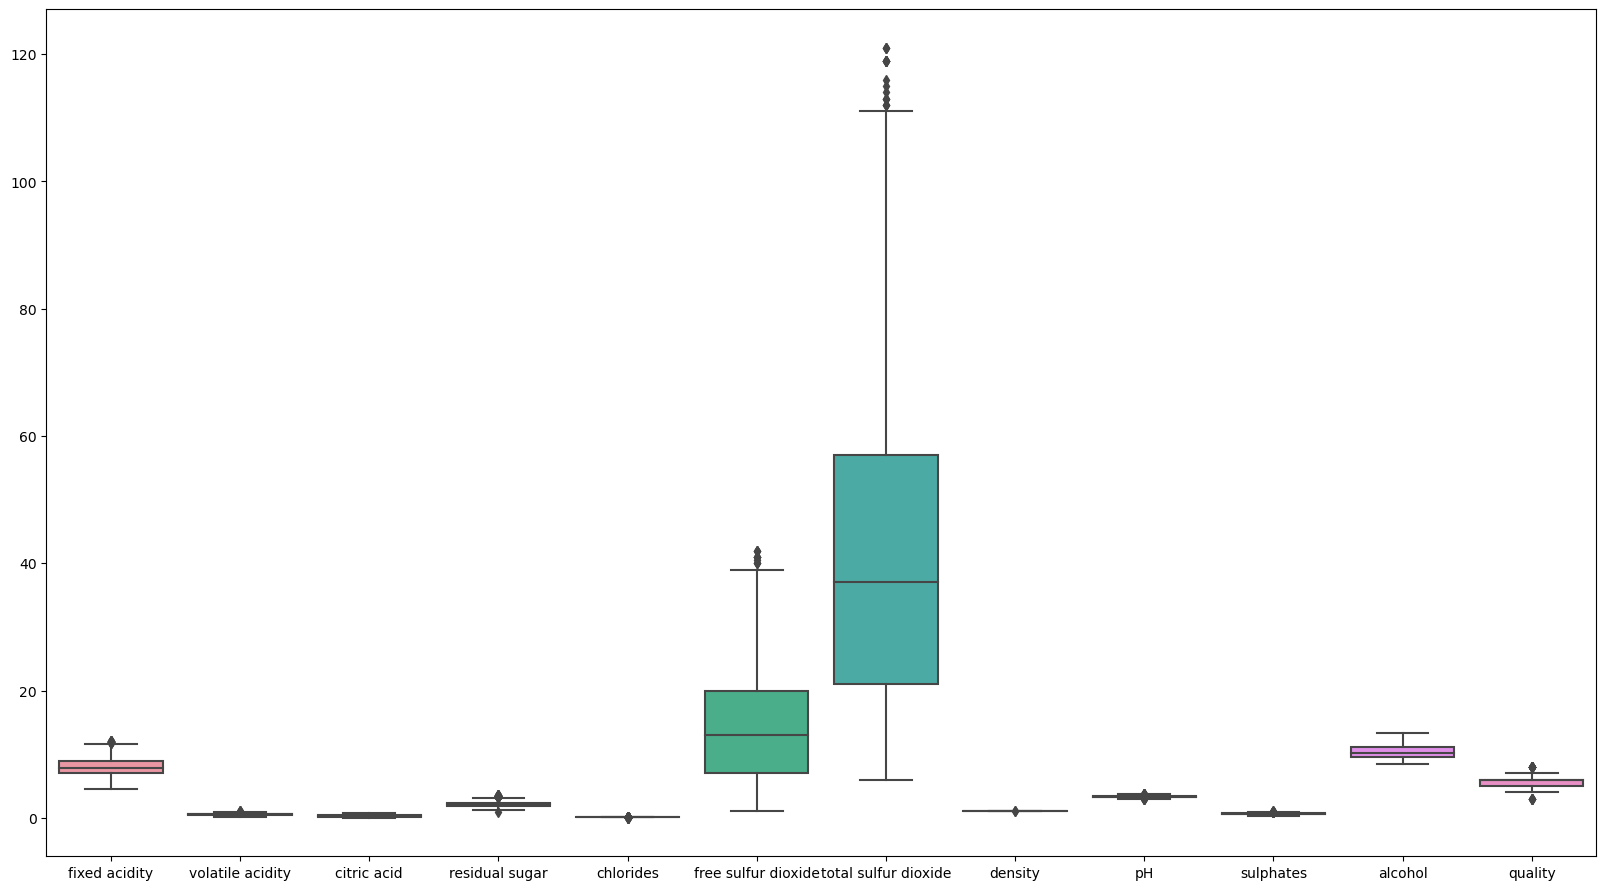

In [37]:

plt.figure(figsize=(20,11))
sns.boxplot(df)


   ### Model building

In [38]:

from scipy.stats import zscore
x=df.drop("quality",axis=1)


y=df["quality"]

In [39]:
X=x.apply(zscore)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03,1.143000e+03
mean,-3.978542e-16,-7.770590e-17,9.946355e-17,-2.859577e-16,-4.973178e-17,9.324708e-17,-1.864942e-17,8.474294e-14,-1.939539e-15,-4.320448e-16,3.978542e-16
std,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00,1.000438e+00
min,-2.445433e+00,-2.436977e+00,-1.370101e+00,-2.989853e+00,-2.624446e+00,-1.538699e+00,-1.385872e+00,-2.722877e+00,-2.724139e+00,-2.599378e+00,-1.964994e+00
25%,-7.069661e-01,-7.928778e-01,-9.095169e-01,-6.573997e-01,-6.058322e-01,-8.810726e-01,-8.143909e-01,-6.636625e-01,-6.925131e-01,-7.260918e-01,-8.871383e-01
50%,-1.506566e-01,-2.362054e-02,-9.070074e-02,0.000000e+00,-9.659962e-16,-2.234467e-01,-2.048110e-01,1.340872e-13,0.000000e+00,-1.300463e-01,-2.012298e-01
75%,5.447302e-01,6.702194e-01,7.792914e-01,5.088271e-01,5.078856e-01,5.437836e-01,5.571639e-01,6.588239e-01,6.035238e-01,5.511486e-01,6.806524e-01
max,2.700429e+00,2.902574e+00,2.672804e+00,3.424394e+00,2.804928e+00,2.955079e+00,2.995484e+00,2.591224e+00,2.670177e+00,3.020480e+00,2.934352e+00


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=None)
print("----------------------------------------------------------------------------")
print((" The x trains data is : {0:0.2f}%".format((len(X_train)/len(df))*100)),X_train.shape)
print((" The y trains data is : {0:0.2f}%".format((len(y_train)/len(df))*100)),y_train.shape)
print((" The x test data is : {0:0.2f}%".format((len(X_test)/len(df))*100)),X_test.shape)
print((" The y test data is : {0:0.2f}%".format((len(y_test)/len(df))*100)),y_test.shape)
print("-------------------------------------------------------------------------")


----------------------------------------------------------------------------
 The x trains data is : 69.99% (800, 11)
 The y trains data is : 69.99% (800,)
 The x test data is : 30.01% (343, 11)
 The y test data is : 30.01% (343,)
-------------------------------------------------------------------------


In [41]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
69,-0.011579,0.127214,-0.448933,-0.657400,0.090241,-0.223447,-0.281008,0.296499,-0.062009,-0.385494,-1.377073
678,-0.706966,0.217715,-0.653637,-1.357136,-0.048973,-0.881073,-0.928687,-0.476461,-0.272177,-0.130046,-1.083112
681,0.266575,0.821054,-0.346581,-0.190909,1.273567,0.872597,2.690694,0.375003,-1.252962,-1.322137,-1.181099
836,-0.915582,0.821054,-1.011869,-1.357136,-0.605832,0.105366,0.709559,-0.597236,-0.132065,-0.300345,-1.083112
49,-0.289734,1.002056,-0.244229,-0.657400,0.368671,0.324575,1.966817,-0.367764,0.008047,-1.322137,-0.887138


## LOGISTIC REGRESSION

In [68]:
accuracies={}

In [69]:
logit = LogisticRegression(random_state=0)
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,logit_pred))

print("-----------------------------------------------------------")


acc=round(accuracy_score(y_test,logit_pred)*100,2)
accuracies["LogisticRegression"]=acc
print("accuracy score: {:.2f}%".format(acc))


Accuracy on Training data: 0.625
Accuracy on Test data: 0.5947521865889213
-----------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.65      0.74      0.70       143
           6       0.56      0.60      0.58       139
           7       0.45      0.34      0.39        41
           8       0.00      0.00      0.00         4

    accuracy                           0.59       343
   macro avg       0.28      0.28      0.28       343
weighted avg       0.55      0.59      0.57       343

-----------------------------------------------------------
accuracy score: 59.48%


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Text(0.5, 1.0, 'Confusion Matrix')

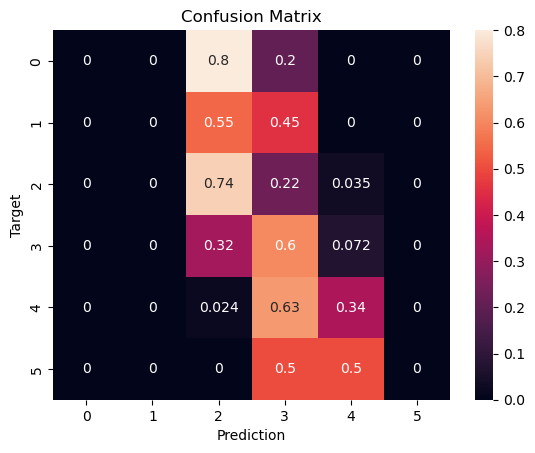

In [43]:

cf = confusion_matrix(y_test, logit_pred, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

## KNN 

In [70]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")

acc=round(accuracy_score(y_test,knn_pred)*100,2)
accuracies["KNeighborsClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))

Accuracy on Training data: 0.70875
Accuracy on Test data: 0.5072886297376094
---------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.60      0.68      0.63       143
           6       0.48      0.45      0.46       139
           7       0.33      0.37      0.35        41
           8       0.00      0.00      0.00         4

    accuracy                           0.51       343
   macro avg       0.24      0.25      0.24       343
weighted avg       0.48      0.51      0.49       343

-----------------------------------------------------------
accuracy score: 50.73%


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

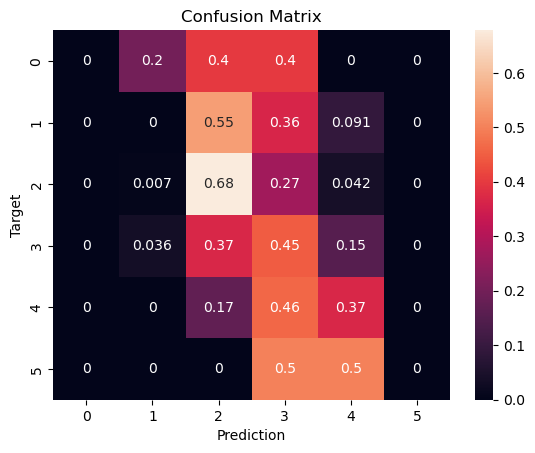

In [45]:

cf = confusion_matrix(y_test, knn_pred, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

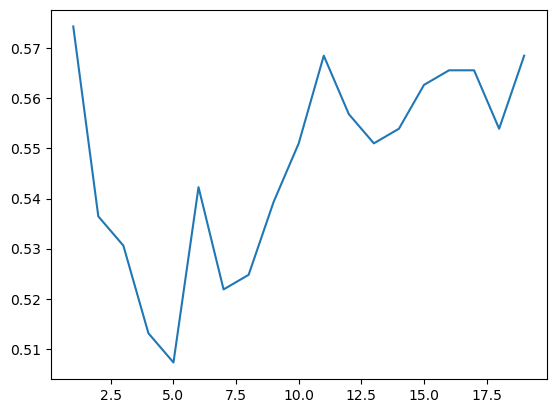

In [46]:
### fin dthe optimum k value
test_score=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    test_score.append(knn.score(X_test,y_test))
test_score


plt.plot(range(1,20),test_score)

Accuracy on Training data: 0.63375
Accuracy on Test data: 0.565597667638484
---------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.60      0.68      0.63       143
           6       0.48      0.45      0.46       139
           7       0.33      0.37      0.35        41
           8       0.00      0.00      0.00         4

    accuracy                           0.51       343
   macro avg       0.24      0.25      0.24       343
weighted avg       0.48      0.51      0.49       343

-----------------------------------------------------------
accuracy score: 56.56%


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

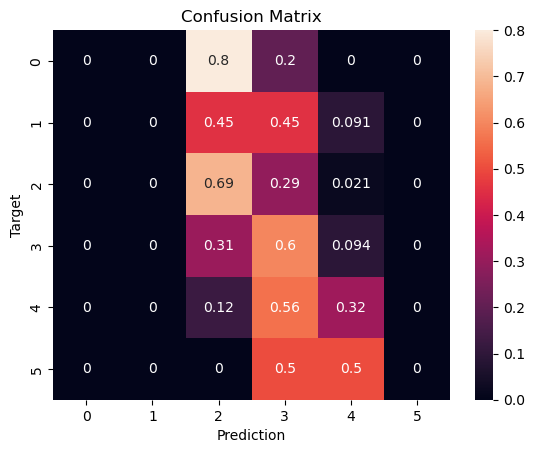

In [71]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
knn_pred1 = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")
acc=round(accuracy_score(y_test,knn_pred1)*100,2)
accuracies["KNeighborsClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))

cf = confusion_matrix(y_test, knn_pred1, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')


## NAIVE BAYES

training data: 0.60125
testing data: 0.5714285714285714
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.65      0.77      0.71       143
           6       0.60      0.43      0.50       139
           7       0.39      0.63      0.49        41
           8       0.00      0.00      0.00         4

    accuracy                           0.57       343
   macro avg       0.27      0.31      0.28       343
weighted avg       0.56      0.57      0.56       343

-----------------------------------------------------------------
accuracy score: 57.14%
-----------------------------------------------------------------


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

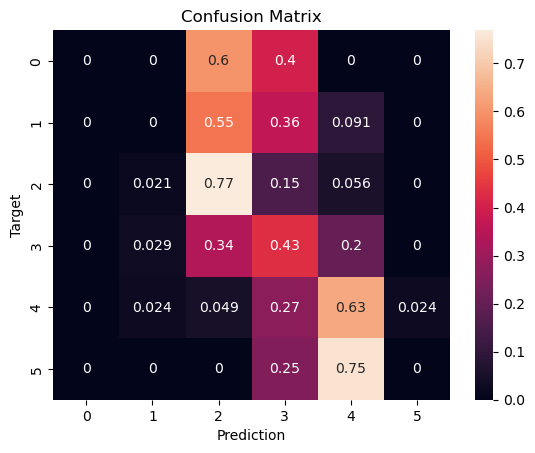

In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()#by using default parameter
nb.fit(X_train,y_train)
nb_pre=nb.predict(X_test)#predict the test values


print("training data:",nb.score(X_train,y_train))
print("testing data:",nb.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nb_pre))
print("-----------------------------------------------------------------")




acc=round(accuracy_score(y_test,nb_pre)*100,2)
accuracies["GaussianNB"]=acc
print("accuracy score: {:.2f}%".format(acc))
print("-----------------------------------------------------------------")

cf = confusion_matrix(y_test, nb_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')




## RANDOM FOREST CLASSIFIER

training data: 1.0
testing data: 0.6588921282798834
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.70      0.78      0.74       143
           6       0.63      0.68      0.66       139
           7       0.56      0.46      0.51        41
           8       0.00      0.00      0.00         4

    accuracy                           0.66       343
   macro avg       0.32      0.32      0.32       343
weighted avg       0.62      0.66      0.64       343

-----------------------------------------------------------------
accuracy score: 65.89%


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

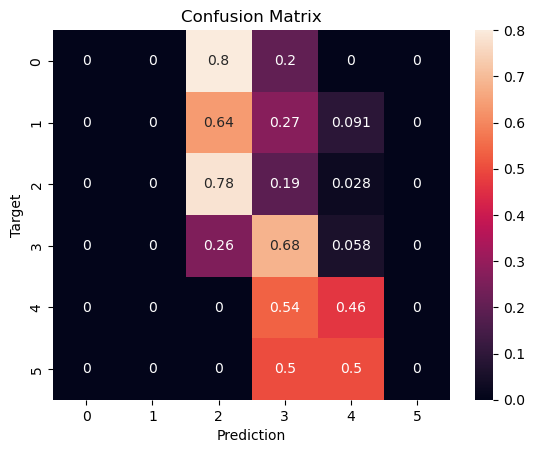

In [73]:
rfc=RandomForestClassifier(random_state=0)#by using default parameter
rfc.fit(X_train,y_train)
rfc_pre=rfc.predict(X_test)#predict the test values


print("training data:",rfc.score(X_train,y_train))
print("testing data:",rfc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")

acc=round(accuracy_score(y_test,rfc_pre)*100,2)
accuracies["RandomForestClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))


cf = confusion_matrix(y_test, rfc_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')


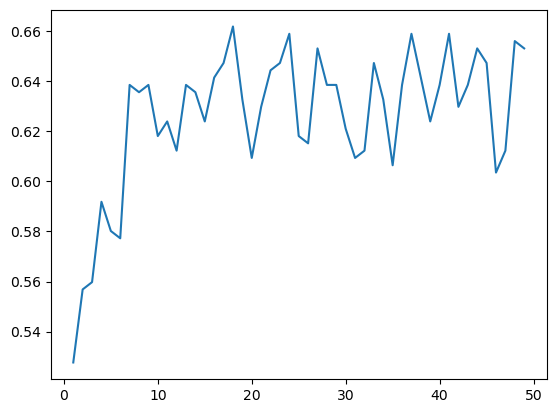

In [50]:
test_score=[]
for i in range(1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    rf_pre=rf.predict(X_test)
    test_score.append(rf.score(X_test,y_test))
plt.plot(range(1,50),test_score)

training data: 1.0
testing data: 0.6268221574344023
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.70      0.78      0.74       143
           6       0.63      0.68      0.66       139
           7       0.56      0.46      0.51        41
           8       0.00      0.00      0.00         4

    accuracy                           0.66       343
   macro avg       0.32      0.32      0.32       343
weighted avg       0.62      0.66      0.64       343

-----------------------------------------------------------------
accuracy score: 62.68%


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

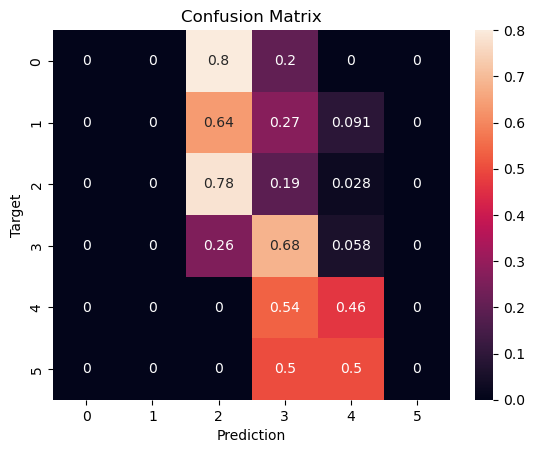

In [74]:
rfc=RandomForestClassifier(n_estimators=39,random_state=0)#by using default parameter
rfc.fit(X_train,y_train)
rfc_pre1=rfc.predict(X_test)#predict the test values


print("training data:",rfc.score(X_train,y_train))
print("testing data:",rfc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")


acc=round(accuracy_score(y_test,rfc_pre1)*100,2)
accuracies["RandomForestClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))



cf = confusion_matrix(y_test, rfc_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')


## DECISION TREE CLASSIFIER

training data: 1.0
testing data: 0.5422740524781341
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.69      0.61      0.65       143
           6       0.54      0.55      0.54       139
           7       0.37      0.56      0.44        41
           8       0.00      0.00      0.00         4

    accuracy                           0.54       343
   macro avg       0.27      0.29      0.27       343
weighted avg       0.55      0.54      0.54       343

-----------------------------------------------------------------
accuracy score: 54.23%
-----------------------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

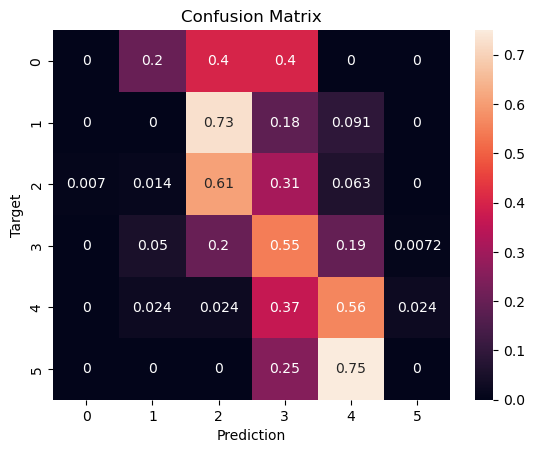

In [75]:
d_tree=DecisionTreeClassifier(random_state=0)#by using default parameter
d_tree.fit(X_train,y_train)
d_tree_pre=d_tree.predict(X_test)#predict the test values


print("training data:",d_tree.score(X_train,y_train))
print("testing data:",d_tree.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,d_tree_pre))
print("-----------------------------------------------------------------")


acc=round(accuracy_score(y_test,d_tree_pre)*100,2)
accuracies["DecisionTreeClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))

print("-----------------------------------------------------------------")

cf = confusion_matrix(y_test, d_tree_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

[Text(0.4502420604182804, 0.9722222222222222, 'x[10] <= -0.544\ngini = 0.639\nsamples = 800\nvalue = [1, 22, 340, 323, 102, 12]'),
 Text(0.20162664601084432, 0.9166666666666666, 'x[9] <= 0.083\ngini = 0.462\nsamples = 320\nvalue = [0, 11, 218, 86, 4, 1]'),
 Text(0.061192873741285826, 0.8611111111111112, 'x[9] <= -0.939\ngini = 0.396\nsamples = 239\nvalue = [0, 9, 179, 49, 2, 0]'),
 Text(0.019829589465530595, 0.8055555555555556, 'x[10] <= -0.74\ngini = 0.223\nsamples = 65\nvalue = [0, 3, 57, 5, 0, 0]'),
 Text(0.009914794732765297, 0.75, 'x[9] <= -2.344\ngini = 0.103\nsamples = 55\nvalue = [0, 3, 52, 0, 0, 0]'),
 Text(0.004957397366382649, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.014872192099147948, 0.6944444444444444, 'x[0] <= 0.406\ngini = 0.071\nsamples = 54\nvalue = [0, 2, 52, 0, 0, 0]'),
 Text(0.009914794732765297, 0.6388888888888888, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43, 0, 0, 0]'),
 Text(0.019829589465530595, 0.6388888888888888, '

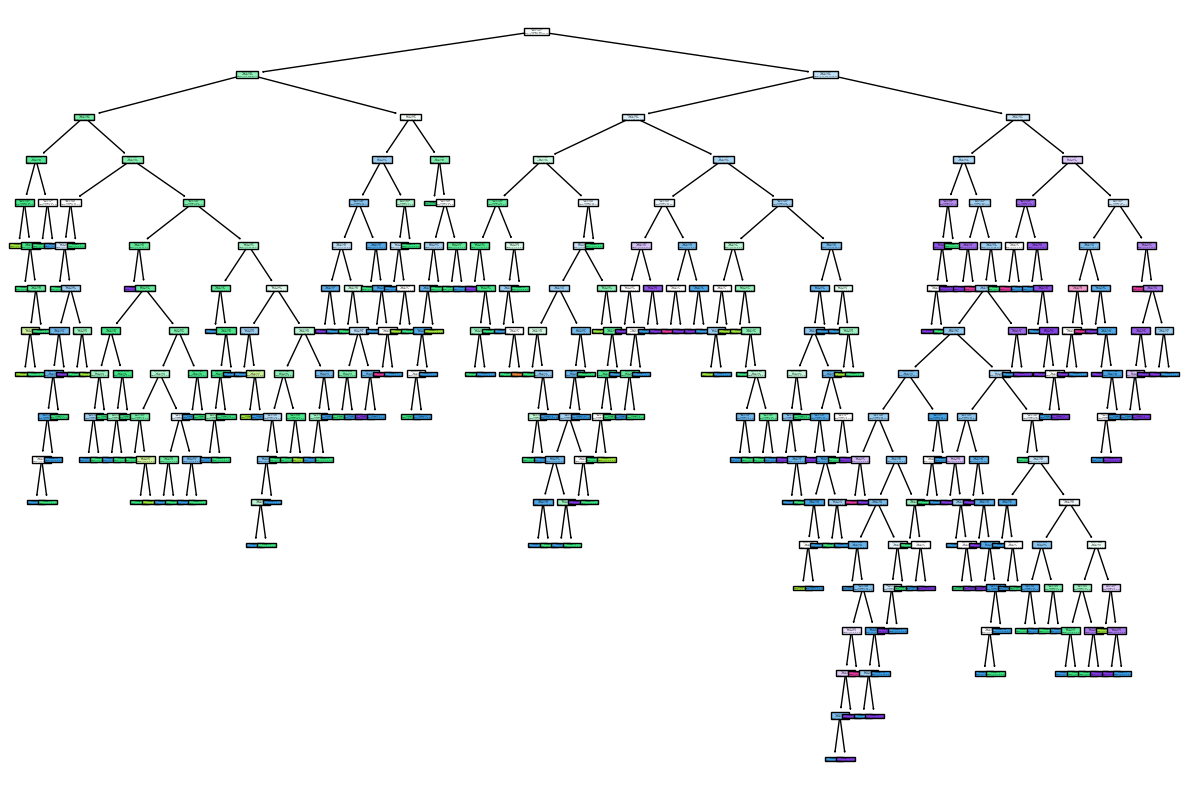

In [53]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(d_tree,filled=True)

## GRADIENT BOOSTING

training data: 0.94625
testing data: 0.5918367346938775
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.68      0.74      0.71       143
           6       0.56      0.57      0.57       139
           7       0.43      0.44      0.43        41
           8       0.00      0.00      0.00         4

    accuracy                           0.59       343
   macro avg       0.28      0.29      0.28       343
weighted avg       0.56      0.59      0.58       343

-----------------------------------------------------------------
accuracy score: 59.18%
-----------------------------------------------------------------


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

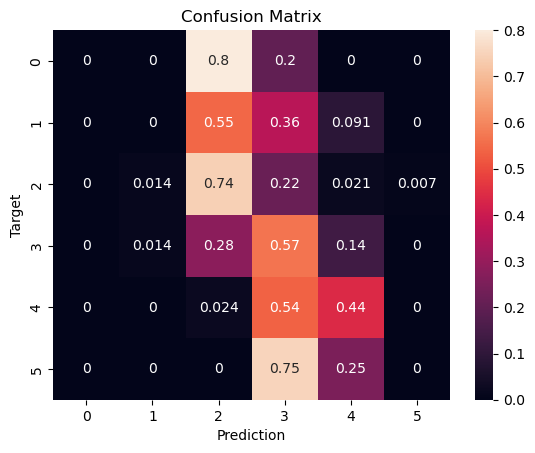

In [76]:
G_tree=GradientBoostingClassifier(random_state=0)#by using default parameter
G_tree.fit(X_train,y_train)
G_tree_pre=G_tree.predict(X_test)#predict the test values


print("training data:",G_tree.score(X_train,y_train))
print("testing data:",G_tree.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,G_tree_pre))
print("-----------------------------------------------------------------")


acc=round(accuracy_score(y_test,G_tree_pre)*100,2)
accuracies["GradientBoostingClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))

print("-----------------------------------------------------------------")

cf = confusion_matrix(y_test, G_tree_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### AdaBoostClassifier

training data: 0.50875
testing data: 0.42565597667638483
-------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.09      0.27      0.14        11
           5       0.59      0.42      0.49       143
           6       0.44      0.58      0.50       139
           7       0.10      0.05      0.06        41
           8       0.00      0.00      0.00         4

    accuracy                           0.43       343
   macro avg       0.20      0.22      0.20       343
weighted avg       0.44      0.43      0.42       343

-----------------------------------------------------------------
accuracy score: 42.57%
-----------------------------------------------------------------


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

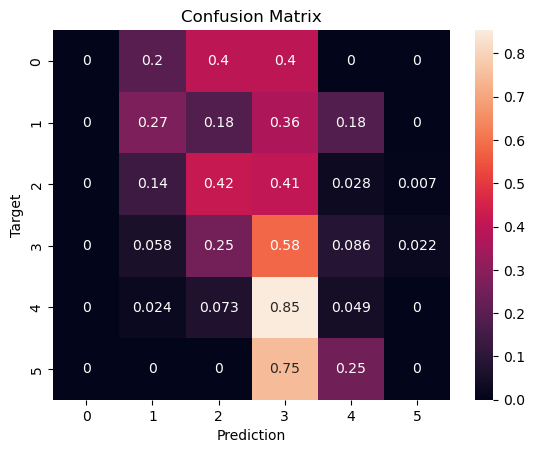

In [77]:
abc=AdaBoostClassifier(random_state=0)#by using default parameter
abc.fit(X_train,y_train)
abc_pre=abc.predict(X_test)#predict the test values


print("training data:",abc.score(X_train,y_train))
print("testing data:",abc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,abc_pre))
print("-----------------------------------------------------------------")

acc=round(accuracy_score(y_test,abc_pre)*100,2)
accuracies["AdaBoostClassifier"]=acc
print("accuracy score: {:.2f}%".format(acc))

print("-----------------------------------------------------------------")

cf = confusion_matrix(y_test, abc_pre, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [78]:
accuracies

{'LogisticRegression': 59.48,
 'KNeighborsClassifier': 56.56,
 'GaussianNB': 57.14,
 'RandomForestClassifier': 62.68,
 'DecisionTreeClassifier': 54.23,
 'GradientBoostingClassifier': 59.18,
 'AdaBoostClassifier': 42.57}

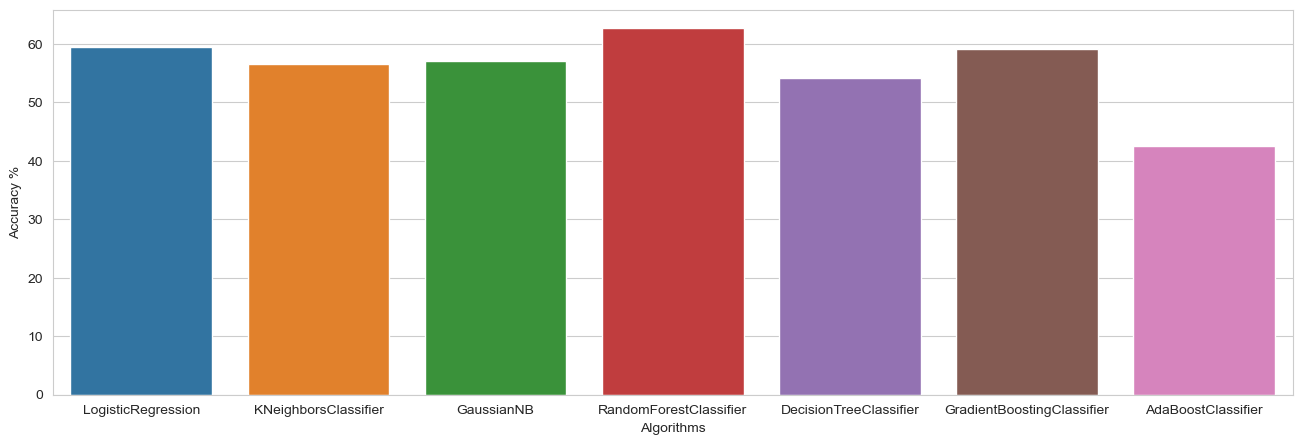

In [82]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

### k fold

C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression: 0.559146 (0.066036)
KNeighborsClassifier: 0.512609 (0.071391)
GaussianNB: 0.560877 (0.048676)
Support vector: 0.469794 (0.046961)
RandomForestClassifier: 0.559924 (0.054239)
DecisionTreeClassifier: 0.428696 (0.043756)
AdaBoostClassifier: 0.518078 (0.059498)
GradientBoostingClassifier: 0.547750 (0.063899)


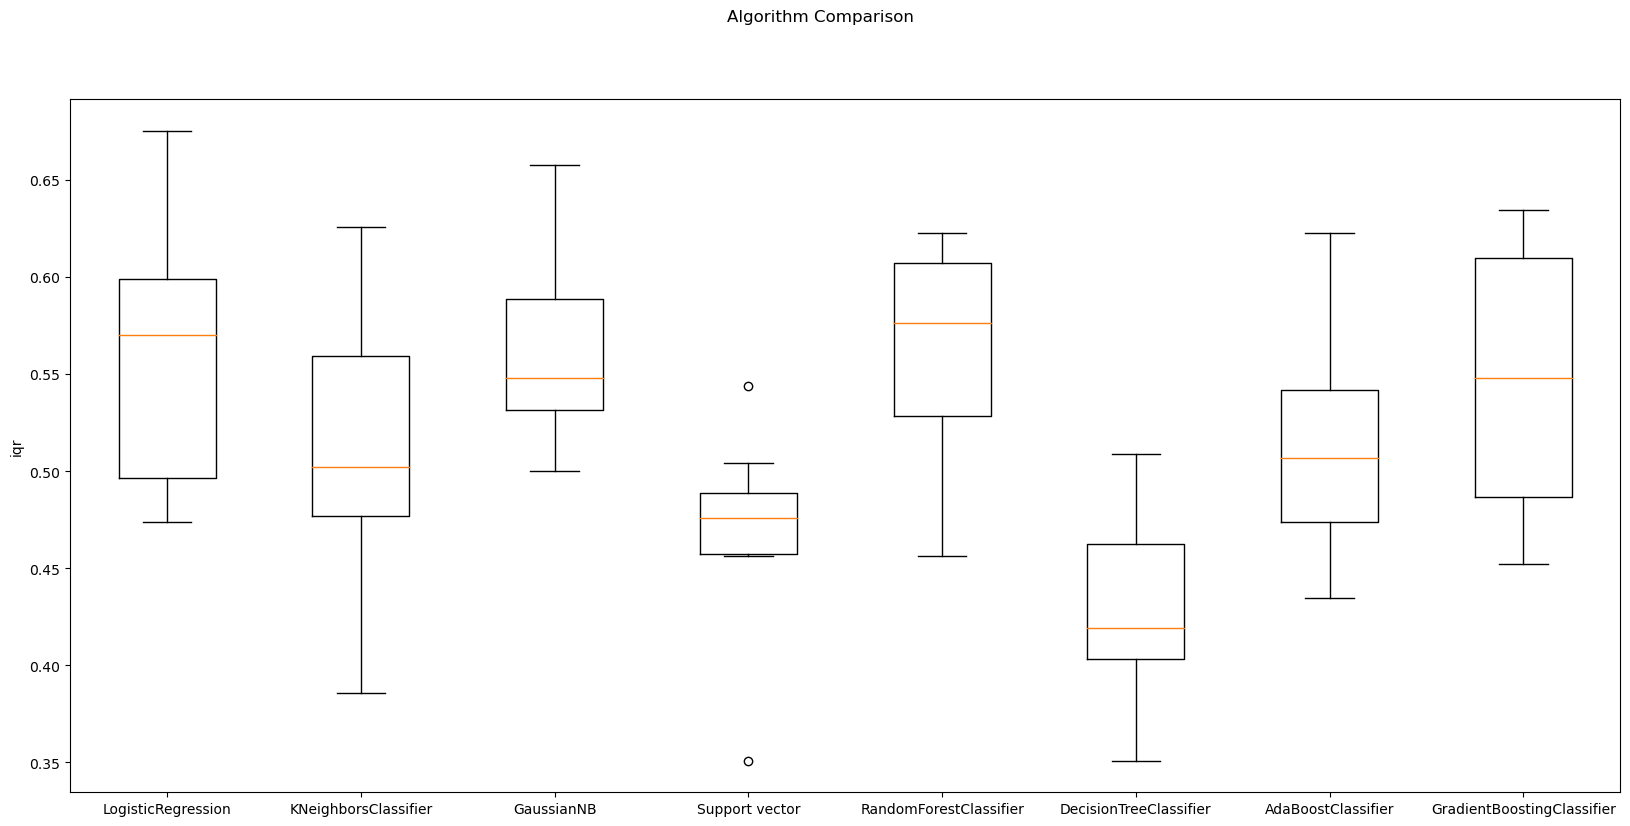

In [63]:
Lr=LogisticRegression()
Knn=KNeighborsClassifier(n_neighbors=13)
from sklearn.naive_bayes import GaussianNB
Gn=GaussianNB()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
Rf=RandomForestClassifier(n_estimators=9)
svc=SVC()
D_Tree=DecisionTreeClassifier()
models = []
models.append(('LogisticRegression', Lr))
models.append(('KNeighborsClassifier', Knn))
models.append(('GaussianNB', Gn))
models.append(("Support vector",svc))
models.append(("RandomForestClassifier",Rf))
models.append(("DecisionTreeClassifier",D_Tree))
models.append(("AdaBoostClassifier",abc))
models.append(("GradientBoostingClassifier",gb))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model,  x,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#algorithm comparision
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.ylabel("iqr")

plt.show()